<a href="https://colab.research.google.com/github/fatimahaidara/School_Project/blob/main/IntroML_2021Q3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutoriel: Introduction to Marchine Learning
=============

Librairies used:
1.    python `scikit-learn`, `pandas`
2.   numpy`

some parts are from  works done [here](
https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50)

Ce document propose les trois étapes suivantes: 
1. chargement et prétraitement des données, 
2. estimations de différents modèles sur quelques versions du jeu de données,
3. comparaison des résultats.

Ce tutoriel ne se veut pas exhaustif. Lorsque les notions abordées requièrent plus de précisions, nous proposons des compléments d'information externes. De plus, il y a quelques références plus générales sur les librairies à la fin du tutoriel.  

### Auteur: 
- ML Training- ULaval <emmapenka@yahoo.com>

### Table des matières

- [Day 1. Introduction ](#introduction) and [Data](#pre-processing)
- [Day 2. Supervised Learning](#modelling)
- [Day 3. Neural Network and Unsupervised Learning](#modelling)
- [Conclusions](#concluding-remarks)

# **Day 1 Data**
## Introduction
Abstract: The German Credit data set is a publically available data set downloaded from the UCI Machine Learning Repository. The data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants [click here](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data). 




This dataset classifies people described by a set of attributes as good or bad credit risks.

In [ ]:
%%html
<marquee style='width: 100%; color: blue;'><b>Part 1 - Data : Introduction to Machine Learning (LABIFUL, 2021)!</b></marquee>

In [ ]:
%%html
<marquee behavior="scroll" direction="down">stay tuned Part 2, Nov 12th!...</marquee>


### 1.1: Library
This project has the following prerequisites:

* scikit-learn - Python machine learning library
* NumPy - Python library for scientific computing
* Pandas - Python-based data analysis toolkit



In [ ]:
#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 
#importing seaborn for statistical plots
import seaborn as sns

import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))
import pandas as pd

# test harness and baseline model evaluation for the german credit dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

from sklearn.datasets import make_classification 
#from sklearn.learning_curve import learning_curve 
#from sklearn.cross_validation import train_test_split 
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
import seaborn 
seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid')

from pprint import pprint 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score


# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Data description

The business meaning of each column in the data is as below

*   **Classification** : Whether the issued loan was a good decision or bad
*   **existingchecking**: Status of existing checking account.
* **duration**: Duration of loan in months
* **duration**: Duration of loan in months
* **credithistory**: Credit history of the applicant
* **purpose**: Purpose for the loan
* **creditamount**: Credit amount
* **savings**: Savings account/bonds
* **employementsince**: Present employment since
* **installment**: Installment rate in percentage of disposable income
* **statussex**: Personal status and sex
* **otherdebtors**: Other debtors / guarantors for the applicant
* **residencesince**: Present residence since
* **property**: Property type of applicant
* **age**: Age in years
* **otherinstallmentplans**: Other installment plans
* **housing**: Housing
* **existingcredits**: Number of existing credits at this bank
* **job**: Job
* **peopleliable**: Number of people being liable to provide maintenance for
* **telephone** : Is the Telephone registered or not
* **foreignworker**: Is the applicant a foreign worker




### 1.2:  Data download
The Data Source for the current project is taken from the Kaggle repository with the following Link


In [ ]:
file = '../input/germancreditdata/german.data'
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

In [ ]:
data = pd.read_csv(url,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)
df=data
df.describe

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


<bound method NDFrame.describe of     existingchecking  duration  ... foreignworker classification
0                A11         6  ...          A201              1
1                A12        48  ...          A201              2
2                A14        12  ...          A201              1
3                A11        42  ...          A201              1
4                A11        24  ...          A201              2
..               ...       ...  ...           ...            ...
995              A14        12  ...          A201              1
996              A11        30  ...          A201              1
997              A14        12  ...          A201              1
998              A11        45  ...          A201              2
999              A12        45  ...          A201              1

[1000 rows x 21 columns]>

**Checking missing values**

In [ ]:
dta=df.iloc[:,:].values
#print(dta)
print(df.iloc[0:4,:].values)

[['A11' 6 'A34' 'A43' 1169 'A65' 'A75' 4 'A93' 'A101' 4 'A121' 67 'A143'
  'A152' 2 'A173' 1 'A192' 'A201' 1]
 ['A12' 48 'A32' 'A43' 5951 'A61' 'A73' 2 'A92' 'A101' 2 'A121' 22 'A143'
  'A152' 1 'A173' 1 'A191' 'A201' 2]
 ['A14' 12 'A34' 'A46' 2096 'A61' 'A74' 2 'A93' 'A101' 3 'A121' 49 'A143'
  'A152' 1 'A172' 2 'A191' 'A201' 1]
 ['A11' 42 'A32' 'A42' 7882 'A61' 'A74' 2 'A93' 'A103' 4 'A122' 45 'A143'
  'A153' 1 'A173' 2 'A191' 'A201' 1]]


To test the isnull() method on this series, we can use s.isnull() and view the output:

In [ ]:
df.isnull()

existingchecking  duration  ...  foreignworker  classification
0               False     False  ...          False           False
1               False     False  ...          False           False
2               False     False  ...          False           False
3               False     False  ...          False           False
4               False     False  ...          False           False
..                ...       ...  ...            ...             ...
995             False     False  ...          False           False
996             False     False  ...          False           False
997             False     False  ...          False           False
998             False     False  ...          False           False
999             False     False  ...          False           False

[1000 rows x 21 columns]

In [ ]:
# we should be happy !!!
print(df.isnull().values.any())
print('----')
print(df.isnull().sum())

False
----
existingchecking         0
duration                 0
credithistory            0
purpose                  0
creditamount             0
savings                  0
employmentsince          0
installmentrate          0
statussex                0
otherdebtors             0
residencesince           0
property                 0
age                      0
otherinstallmentplans    0
housing                  0
existingcredits          0
job                      0
peopleliable             0
telephone                0
foreignworker            0
classification           0
dtype: int64


In [ ]:
#In order to get the total summation of all missing values in the DataFrame, we chain two .sum() methods together:
print(df.isnull().sum().sum())

0


## 2: Data Exploration

The target variable or class is the last column and contains values of 1 and 2. These will need to be label encoded to 0 and 1, respectively, to meet the general expectation for imbalanced binary classification tasks where 0 represents the negative case and 1 represents the positive case.

In [ ]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.classification.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data.classification.value_counts()
dataf=data.copy() # for the final analysis

Once loaded, we can summarize the number of rows and columns by printing the shape of the DataFrame.

In [ ]:
# summarize the shape of the dataset
print(data.shape)

(1000, 21)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [ ]:
# summarize the class distribution
from collections import Counter
target = data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=700, Percentage=70.000%
Class=0, Count=300, Percentage=30.000%


we can select the columns with numeric variables by calling the *select_dtypes()*  function on the DataFrame. We can then select just those columns from the DataFrame. We would expect there to be seven, plus the numerical class labels.

In [ ]:
# select columns with numerical data types
num_ix = data.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = data[num_ix]
subset

duration  creditamount  ...  peopleliable  classification
0           6          1169  ...             1               1
1          48          5951  ...             1               0
2          12          2096  ...             2               1
3          42          7882  ...             2               1
4          24          4870  ...             2               0
..        ...           ...  ...           ...             ...
995        12          1736  ...             1               1
996        30          3857  ...             1               1
997        12           804  ...             1               1
998        45          1845  ...             1               0
999        45          4576  ...             1               1

[1000 rows x 8 columns]

We can then create histograms of each numeric input variable. The complete example is listed below.

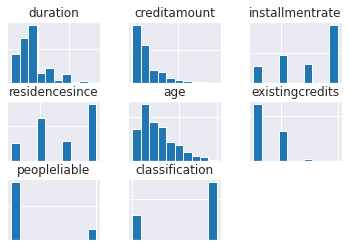

In [ ]:
import matplotlib.pyplot as plt
# create a histogram plot of each numeric variable
ax = subset.hist()
# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
plt.show()
#sns.countplot(x='existingchecking', data = data, hue= 'classification')

In [ ]:
data['existingchecking'].value_counts()

A14    394
A11    274
A12    269
A13     63
Name: existingchecking, dtype: int64

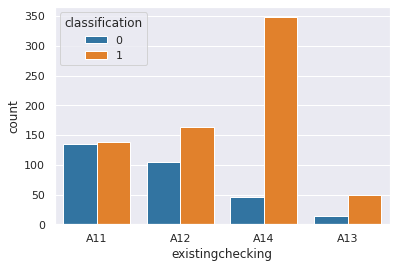

In [ ]:
#sns.countplot(x= 'Sex', data = credit, hue= 'default')
sns.countplot(x='existingchecking', data = data, hue= 'classification')

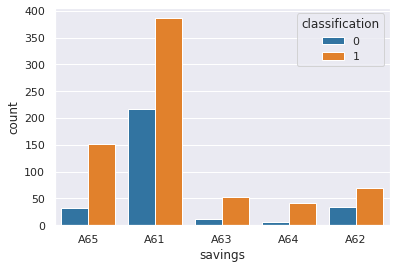

In [ ]:
sns.countplot(x='savings', data = data, hue= 'classification')

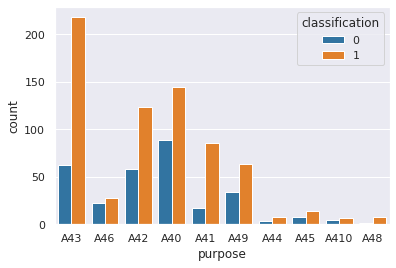

In [ ]:
sns.countplot(x='purpose', data = data, hue= 'classification')

In [ ]:
print("\nLittle Income :\n", data[data['savings'] == 'A61']['classification'].value_counts().to_frame())
print("\nModerate Income\n", data[data['savings'] == 'A62']['classification'].value_counts().to_frame())
print("\nquite rich Income\n", data[data['savings'] == 'A64']['classification'].value_counts().to_frame())



Little Income :
    classification
1             386
0             217

Moderate Income
    classification
1              69
0              34

quite rich Income
    classification
1              42
0               6


existingchecking
credithistory
purpose
savings
employmentsince
statussex
otherdebtors
property
otherinstallmentplans
housing
job
telephone
foreignworker


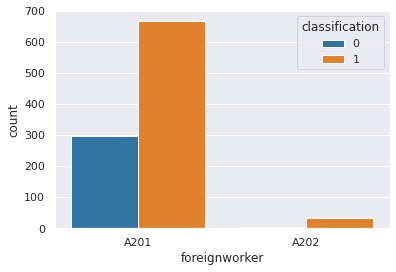

In [ ]:
#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']
# disable axis labels to avoid the clutter
for k in catvars:
  print(k)
sns.countplot(x=k, data = data, hue= 'classification')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41a1dd9d50>,
      dtype=object)

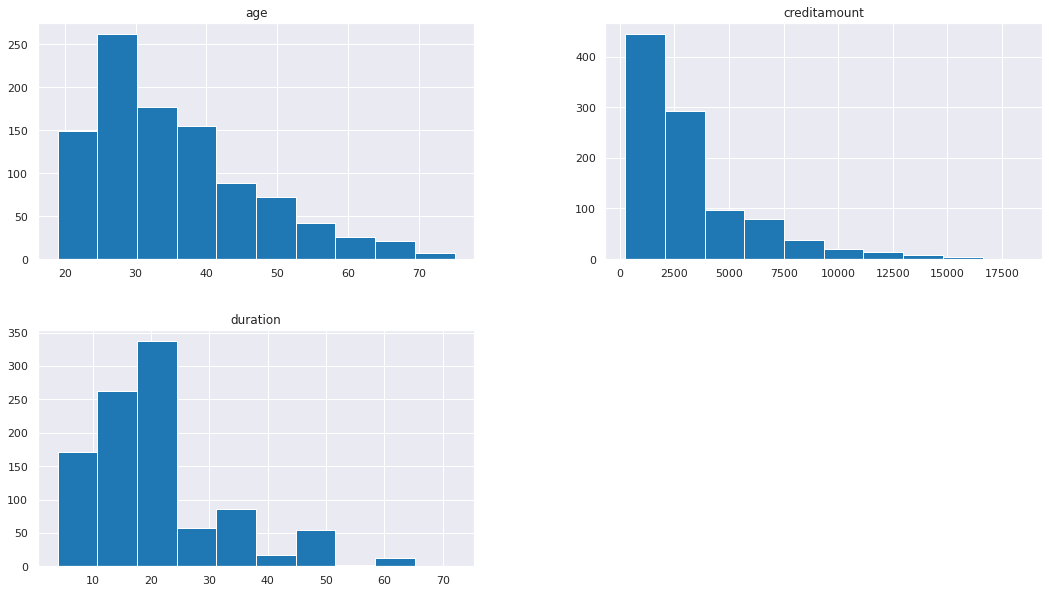

In [ ]:
#Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
data.hist(['age', 'creditamount','duration'], figsize=(18,10))

Selected Continuous Variables:

    age: Selected. Slightly skewed distribution, acceptable.
    amount: Selected. Slightly skewed distribution, acceptable.
    duration: Selected. Slightly skewed distribution, acceptable.


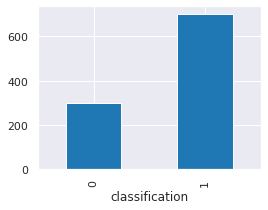

In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('classification').size()
GroupedData.plot(kind='bar', figsize=(4,3))

## 3:  Feature Engineering & Data Pre-Processing

- Data transformation
- Encoding Categorical Feature
- Concate Transformed Dataset

### 3.1 Data Pre-processing

Here we discuss the following:
- Classes reductions
- LAbel encoding
- Mean target reduction




#### 3.1.1 Classes reduction
we can reduce classes of some categories. So, based on the inference of 'Savings Account' or 'savings' and 'existingchecking' we can club the columns into reduce categories (03)


Attribute 1: (qualitative)
1. Status of existing checking account
- A11 : ... < 0 DM
- A12 : 0 <= ... < 200 DM
- A13 : ... >= 200 DM / salary assignments for at least 1 year
- A14 : no checking account

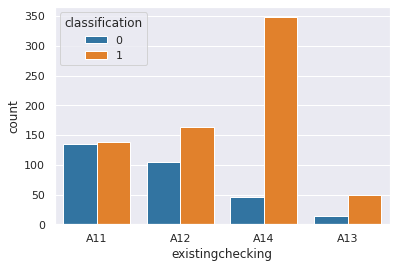

In [ ]:
sns.countplot(x= 'existingchecking', data = data, hue= 'classification')

In [ ]:
# Application for the farure "checking Account"
data2=data
# 'Checking Account'
data2['existingchecking']= data2['existingchecking'].map({'A11': 'A11', 'A12': 'A12','A14':'A14', 'A13':'A14' })

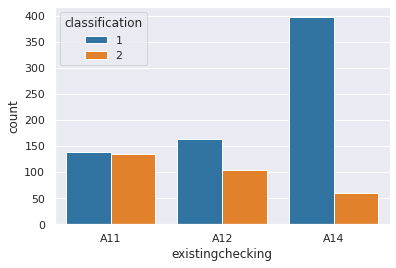

In [ ]:
sns.countplot(x= 'existingchecking', data = data2, hue= 'classification')

#### 3.1.2 Label Encoding

We can also perform some label encoding Attribute 4: (qualitative)

2. Label encoding for 'Purpose'
- A40 : car (new)
- A41 : car (used)
- A42 : furniture/equipment
- A43 : radio/television
- A44 : domestic appliances
- A45 : repairs
- A46 : education
- A47 : (vacation - does not exist?)
- A48 : retraining
- A49 : business
- A410 : others

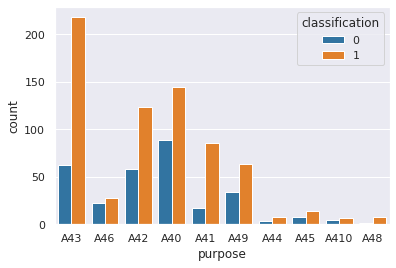

In [ ]:
sns.countplot(x='purpose', data = data, hue= 'classification')

In [ ]:
## LabeEncoding the Purpose column
le = LabelEncoder()
data2['purpose'] = le.fit_transform(data2['purpose'])
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", data2['purpose'].unique().tolist())

The various purposes are:  ['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49'] 
And the hot encoded numbers for the same are [4, 7, 3, 0, 1, 9, 5, 6, 2, 8]


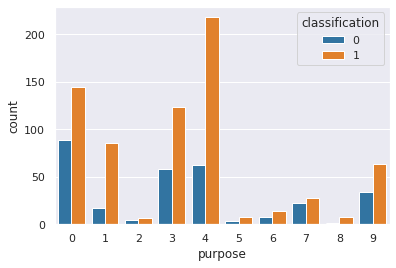

In [ ]:
sns.countplot(x='purpose', data = data2, hue= 'classification')

**Important to note** 


 The numerical value assigned does not have any mathematical value attached to them. Meaning, basic mathematical operations such as addition, subtraction, multiplication, or division are pointless. 'A40' + 'A42' or 'A43'/'A48' does not make any sense.

#### 3.1.3 Mean Target Encoding
In Mean Encoding we take the number of labels into account along with the target variable to encode the labels into machine comprehensible values



In [ ]:
! pip install category_encoders # force Manual installation
import category_encoders as ce


encoder = ce.TargetEncoder()
#encoder = ce.WOEEncoder(cols=[...])
X_target_encoded = encoder.fit_transform(data['purpose'], data['classification'])

#encoder.fit(X, y)
#X_cleaned = encoder.transform(X_dirty
X_target_encoded.head(20) # 


     |████████████████████████████████| 82 kB 379 kB/s 


purpose
0   1.221429
1   1.221429
2   1.440000
3   1.320442
4   1.380342
5   1.440000
6   1.320442
7   1.165049
8   1.221429
9   1.380342
10  1.380342
11  1.350515
12  1.221429
13  1.380342
14  1.380342
15  1.221429
16  1.221429
17  1.350515
18  1.165049
19  1.221429

### 3.2 Feature Engineering & Data Processing

we are going to do some
- standardization
- dummies
- Max- Min rescaling [0 1]

In [ ]:
data.replace(np.nan, 0) #For the whole DataFrame using numpy:

existingchecking  duration  ... foreignworker classification
0                A11         6  ...          A201              1
1                A12        48  ...          A201              2
2                A14        12  ...          A201              1
3                A11        42  ...          A201              1
4                A11        24  ...          A201              2
..               ...       ...  ...           ...            ...
995              A14        12  ...          A201              1
996              A11        30  ...          A201              1
997              A14        12  ...          A201              1
998              A11        45  ...          A201              2
999              A12        45  ...          A201              1

[1000 rows x 21 columns]

In [ ]:
#create quickaccess list with categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']
#create quickaccess list with numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.classification.replace([1,2], [1,0], inplace=True)


Let us do some standardization

In [ ]:
# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))
# MinMax Rescaling to [0,1]
numdata_minmax = pd.DataFrame(MinMaxScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))
print([numdata_std])
print([numdata_minmax])

[            0         1         2         3         4         5         6
0   -0.745131 -1.236478  0.918477  1.046987  2.766456  1.027079 -0.428290
1    0.949817  2.248194 -0.870183 -0.765977 -1.191404 -0.704926 -0.428290
2   -0.416562 -0.738668 -0.870183  0.140505  1.183312 -0.704926  2.334869
3    1.634247  1.750384 -0.870183  1.046987  0.831502 -0.704926  2.334869
4    0.566664  0.256953  0.024147  1.046987  1.535122  1.027079  2.334869
..        ...       ...       ...       ...       ...       ...       ...
995 -0.544162 -0.738668  0.024147  1.046987 -0.399832 -0.704926 -0.428290
996  0.207612  0.754763  0.918477  1.046987  0.391740 -0.704926 -0.428290
997 -0.874503 -0.738668  0.918477  1.046987  0.215835 -0.704926 -0.428290
998 -0.505528  1.999289  0.918477  1.046987 -1.103451 -0.704926 -0.428290
999  0.462457  1.999289  0.024147  1.046987 -0.751642 -0.704926 -0.428290

[1000 rows x 7 columns]]
[            0         1         2         3         4         5    6
0    0.050567  

One -hot encoding

In [ ]:
# One hot encoding
#create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data[catvars])
dummyvars 

existingchecking_A11  ...  foreignworker_A202
0                       1  ...                   0
1                       0  ...                   0
2                       0  ...                   0
3                       1  ...                   0
4                       1  ...                   0
..                    ...  ...                 ...
995                     0  ...                   0
996                     1  ...                   0
997                     0  ...                   0
998                     1  ...                   0
999                     0  ...                   0

[1000 rows x 54 columns]

Let us arrange the final data

In [ ]:
# 1) append the dummy variable of the initial numerical variables numvars
data_clean = pd.concat([data[numvars], dummyvars], axis = 1) 
# 2) append the standard variable + target + numerical dummies
data_std = pd.concat([numdata_std, data['classification'], dummyvars], axis = 1)
# 3) append the minmaxRescaling [0,1] + target + numerical dummies
data_minmax = pd.concat([numdata_minmax, data['classification'], dummyvars], axis = 1)

# 1) Unscaled, unnormalized data  (without Std or minMax Rescaling)
X_clean = data_clean.drop('classification', axis=1)
y_clean = data_clean['classification']

# 2) Standardized data
X_std = data_std.drop('classification', axis=1)
y_std = data_std['classification']

# 3) Rescaled data [0,1]
X_minmax = data_minmax.drop('classification', axis=1)
y_minmax = data_minmax['classification']

In [ ]:
X_clean.columns

Index(['creditamount', 'duration', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'employmentsince_A71', 'employmentsince_A72',
       'employmentsince_A73', 'employmentsince_A74', 'employmentsince_A75',
       'statussex_A91', 'statussex_A92', 'statussex_A93', 'statussex_A94',
       'otherdebtors_A101', 'otherdebtors_A102', 'otherdebtors_A103',
       'property_A121', 'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A

In [ ]:
data_minmax['classification']

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: classification, Length: 1000, dtype: int64

# Day 2:  Supervised Learning

#### target variable
When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

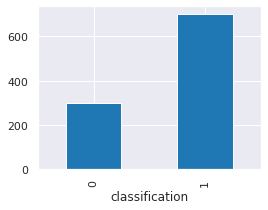

In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('classification').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Part 2:: Supervised Learning !</b></marquee>

### 3.2. Oversampling


[Upsampling Minority]( http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py)
- One can use SMOTE 
- one can use resample


A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).[see details…](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [ ]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto')
X_clean_res, y_clean_res = sm.fit_sample(X_clean, y_clean)
X_std_res, y_std_res = sm.fit_sample(X_std, y_std)
X_minmax_res, y_minmax_res = sm.fit_sample(X_minmax, y_minmax)
X_minmax_res


array([[0.05056674, 0.02941176, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.31368989, 0.64705882, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.10157368, 0.11764706, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29617695, 0.25552202, 0.58331122, ..., 1.        , 1.        ,
        0.        ],
       [0.07072009, 0.2025603 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.03202072, 0.11764706, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
print(y_clean_res.shape)

(1400,)


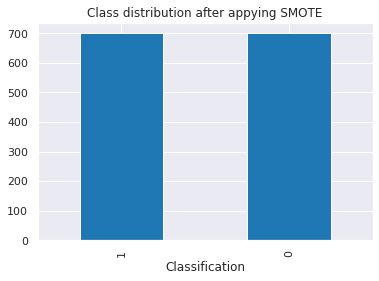

In [ ]:
pd.Series(y_clean_res).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Classification')

###  Model Without SMOTE

### 3.3 Data splitting

 Dividing the Data into 'Train', 'Validation' and 'Test' Sets

In cases with balanced data, we can generate a train/test set simply by randomly assigning 30% of the data to a test set. However, in imbalanced data, this should be avoided. There is a big risk of ending up with almost no cases of the minority class in the test set.

Stratified sampling is a solution to this. Stratified sampling will force the same class balance on the train and test dataset as the original data. You can do stratified sampling using scikitlearn’s train_test_split as follows:

In [ ]:
SEED = 666
x_train,x_val,y_train,y_val = train_test_split(X_clean, y_clean, test_size=0.3, stratify=data.classification, random_state = SEED)
# print proportions
print('train: {}% | Validation: {}%'.format( round(len(y_train)/len(y_clean),2), 
                                                        round(len(y_val)/len(y_clean) ,2) ))

train: 0.7% | Validation: 0.3%


## 4: Modeling Phase: Model Selection

An Analytical comparison is performed initially, to assess which Models fare well in making accurate predictions. In doing so, several classification Techniques are compared. The model should perform better than a base model i.e., the one with 70% and above accuracy. Also, recall should be high because from a Business point of view 'False Negative's'

Let's start with a cross validation. It usually uses Train data only

In [ ]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.740000, RECALL=(0.891277), PRECISION=(0.773138), ROC-AUC=(0.755325)
KNN:
 ACCURACY = 0.625714, RECALL=(0.806435), PRECISION=(0.700762), ROC-AUC=(0.563842)
SGD:
 ACCURACY = 0.544286, RECALL=(0.654857), PRECISION=(0.500000), ROC-AUC=(0.594512)
DT:
 ACCURACY = 0.704286, RECALL=(0.749992), PRECISION=(0.791255), ROC-AUC=(0.643064)
SVC:
 ACCURACY = 0.698571, RECALL=(0.981647), PRECISION=(0.704381), ROC-AUC=(0.576279)
RF:
 ACCURACY = 0.735714, RECALL=(0.908417), PRECISION=(0.764258), ROC-AUC=(0.771705)
Ada:
 ACCURACY = 0.728571, RECALL=(0.856963), PRECISION=(0.779441), ROC-AUC=(0.740667)
Grad:
 ACCURACY = 0.720000, RECALL=(0.870250), PRECISION=(0.765974), ROC-AUC=(0.762928)


### 4.1 Model Choice: Logistic Regression
The reasons for choosing 'Logistic Regression' over other Techniques is as below:

- Simplicity.
- Explainability.
- Accuracy, Recall and ROC-AUC is comparable to Ensemble Methods.

In [ ]:
lr = LogisticRegression()

model = lr.fit(x_train, y_train)

model.score(x_val, y_val)

0.77

In [ ]:
# Logistic Regression - L2 Penalty
X_train=x_train 
y_train = y_train
X_test = x_val
y_test =y_val


from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
#clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
clf = LogisticRegression()

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.65      0.50      0.57        90
           1       0.81      0.89      0.84       210

    accuracy                           0.77       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

[[ 45  45]
 [ 24 186]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.74802495 0.70602911 0.69775382 0.78113208 0.73549151 0.80079051
 0.64809741 0.82520376 0.73944295 0.74      ]

Final Average Accuracy of the model: 0.74


In [ ]:
# Let us test RF
RF = RandomForestClassifier()
modelrf = RF.fit(x_train, y_train)
modelrf.score(x_val, y_val)

0.7866666666666666

In [ ]:
cMatrix = confusion_matrix(y_val, prediction)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[ 45  45]
 [ 24 186]]
Transactions which were falsely classified as FRAUD =  15.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 8.0 Percent
Transactions which were truly classified as FRAUD = 62.0 Percent
Transactions which were truly classified as NOT-FRAUD = 15.0 Percent


In [ ]:
#rf
y_pred_prob = modelrf.predict_proba(x_val)
# Predicted value of each class
y_predrf = modelrf.predict(x_val)
cMatrix = confusion_matrix(y_test, y_predrf)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[ 41  49]
 [ 15 195]]
Transactions which were falsely classified as FRAUD =  16.3 Percent
Transactions which were falsely classified as NOT-FRAUD = 5.0 Percent
Transactions which were truly classified as FRAUD = 65.0 Percent
Transactions which were truly classified as NOT-FRAUD = 13.7 Percent



### 4.2 Others Machine Model Optimization
Models with the regularization of type 'l1' and 'l2' are Optimized using Grid-SearchCV.Several Hyper-parameters were taken into consideration. It is to be observed:

Model for type L1 performs better than L2.
False Classification Rate for the model in section 5.4.1 is lesser than the one in 5.4.2. Hence, We will use it as our Base model.


#### 4.2.1 'l1' Regularization

In [ ]:
LRPipeline1 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({ 'LogReg__penalty': ['l1'],'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['liblinear','saga']})

GSLR1 = GridSearchCV(LRPipeline1, params, cv=10, scoring='accuracy')
GSLR1.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('LogReg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=666,
                                              

In [ ]:
GSLR1.score(x_val, y_val)

0.7866666666666666

In [ ]:
# Fetching the best parameters for Model building
GSLR1.best_params_

{'LogReg__C': 1,
 'LogReg__penalty': 'l1',
 'LogReg__solver': 'liblinear',
 'LogReg__tol': 0.1}

In [ ]:
# Model Accuracy on the Test Set

GSLR1.score(x_val, y_val)

0.7866666666666666

In [ ]:
# Predcited probability of each class.
y_pred_prob1 = GSLR1.predict_proba(x_val)

# Predicted value of each class
y_pred1 = GSLR1.predict(x_val)

In [ ]:
cMatrix1 = confusion_matrix(y_test, y_pred1)
print(cMatrix1)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix1[0][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix1[1][0]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix1[1][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix1[0][0]/ sum(sum(cMatrix1))*100 ))

[[ 47  43]
 [ 21 189]]
Transactions which were falsely classified as FRAUD =  14.3 Percent
Transactions which were falsely classified as NOT-FRAUD = 7.0 Percent
Transactions which were truly classified as FRAUD = 63.0 Percent
Transactions which were truly classified as NOT-FRAUD = 15.7 Percent


#### 4.2.2. L2 Regularisation

In [ ]:
LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({'LogReg__max_iter':[100,200,300,400,500] ,'LogReg__penalty': ['l2'],'LogReg__C': [0.01,0.1,0.5,0.9,1,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['newton-cg','sag','lbfgs']})

GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')

In [ ]:
GSLR2.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('LogReg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=666,
                                              

In [ ]:
# Fetching the best parameters for Model building
GSLR2.best_params_

{'LogReg__C': 0.1,
 'LogReg__max_iter': 100,
 'LogReg__penalty': 'l2',
 'LogReg__solver': 'lbfgs',
 'LogReg__tol': 0.0001}

In [ ]:
# Predcited probability of each class.
y_pred_prob2 = GSLR2.predict_proba(x_train)
# Predicted value of each class
y_pred2 = GSLR2.predict(x_val)

In [ ]:
cMatrix2 = confusion_matrix(y_test, y_pred2)
print(cMatrix2)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix2[0][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix2[1][0]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix2[1][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix2[0][0]/ sum(sum(cMatrix2))*100 ))

[[ 38  52]
 [ 20 190]]
Transactions which were falsely classified as FRAUD =  17.3 Percent
Transactions which were falsely classified as NOT-FRAUD = 6.7 Percent
Transactions which were truly classified as FRAUD = 63.3 Percent
Transactions which were truly classified as NOT-FRAUD = 12.7 Percent


In [ ]:
# Vaues taken from section 5.4.1
finalModel = LogisticRegression(penalty='l1', solver='liblinear', tol=0.1, C=5)

In [ ]:
finalModel.fit(x_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
scoreTrain = finalModel.score(x_train, y_train)
scoreTest = finalModel.score(x_val,y_val)

print("The Accuracy of the model on the Train Set is: %.1f " % (scoreTrain * 100))
print("The Accuracy of the model on the Test Set is: %.1f " % (scoreTest * 100))

The Accuracy of the model on the Train Set is: 77.4 
The Accuracy of the model on the Test Set is: 79.3 


In [ ]:
# Predcited probability of each class.
y_pred_prob_final = finalModel.predict_proba(x_val)

# Predicted value of each class
y_pred_final = finalModel.predict(x_val)

# Predicted Probability of class '0' i.e., not a Fraud Transaction.
y_zero = pd.Series(y_pred_prob_final[:,0])

# Mapping the predicted probability higher than 0.689 to class 0 i.e., Not-Fraud class.
y_pred_optimum = y_zero.map(lambda x: 0 if x>0.689 else 1)

cMatrix = confusion_matrix(y_val, y_pred_optimum)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

[[ 17  73]
 [ 11 199]]
Transactions which were falsely classified as FRAUD =  24.3 Percent
Transactions which were falsely classified as NOT-FRAUD = 3.7 Percent
Transactions which were truly classified as FRAUD = 66.3 Percent
Transactions which were truly classified as NOT-FRAUD = 5.7 Percent


### 4.3 DECISION TREES

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.51      0.44      0.48        90
           1       0.77      0.82      0.80       210

    accuracy                           0.71       300
   macro avg       0.64      0.63      0.64       300
weighted avg       0.70      0.71      0.70       300

[[ 40  50]
 [ 38 172]]
Accuracy of the model on Testing Sample Data: 0.7

Accuracy values for 10-fold Cross Validation:
 [0.73347237 0.67200947 0.7257269  0.6683736  0.6458498  0.64715447
 0.69317015 0.72       0.70602911 0.69317015]

Final Average 

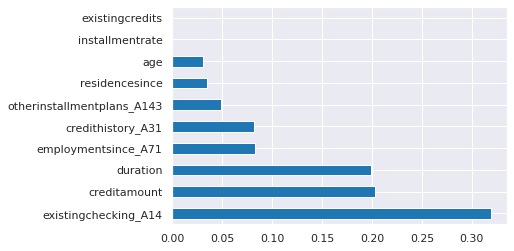

In [ ]:
# Logistic Regression - L2 Penalty
X_train=x_train 
y_train = y_train
X_test = x_val
y_test =y_val

#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=X_clean.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting a Decision Tree

In [ ]:
# Installing the required library for plotting the decision tree
!pip install dtreeplt

     |████████████████████████████████| 790 kB 5.4 MB/s 
     |████████████████████████████████| 374 kB 55.2 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.22 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.29.0 which is incompatible.


In [ ]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=X_clean.columns, target_names=data_clean.classification)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

### 4.4 XG Boosting

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        90
           1       0.81      0.90      0.85       210

    accuracy                           0.78       300
   macro avg       0.75      0.70      0.72       300
weighted avg       0.77      0.78      0.77       300

[[ 45  45]
 [ 20 190]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.80197664 0.68125392 0.77519841 0.75665219 0.70602911 0.68801189
 0.77229833 

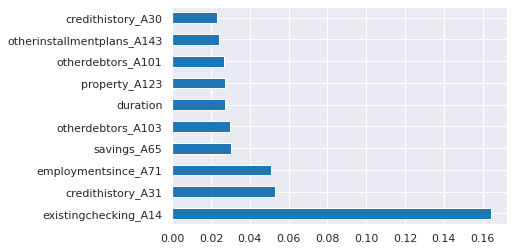

In [ ]:
# Logistic Regression - L2 Penalty
X_train=x_train 
y_train = y_train
X_test = x_val
y_test =y_val

# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=X_clean.columns)
feature_importances.nlargest(10).plot(kind='barh')

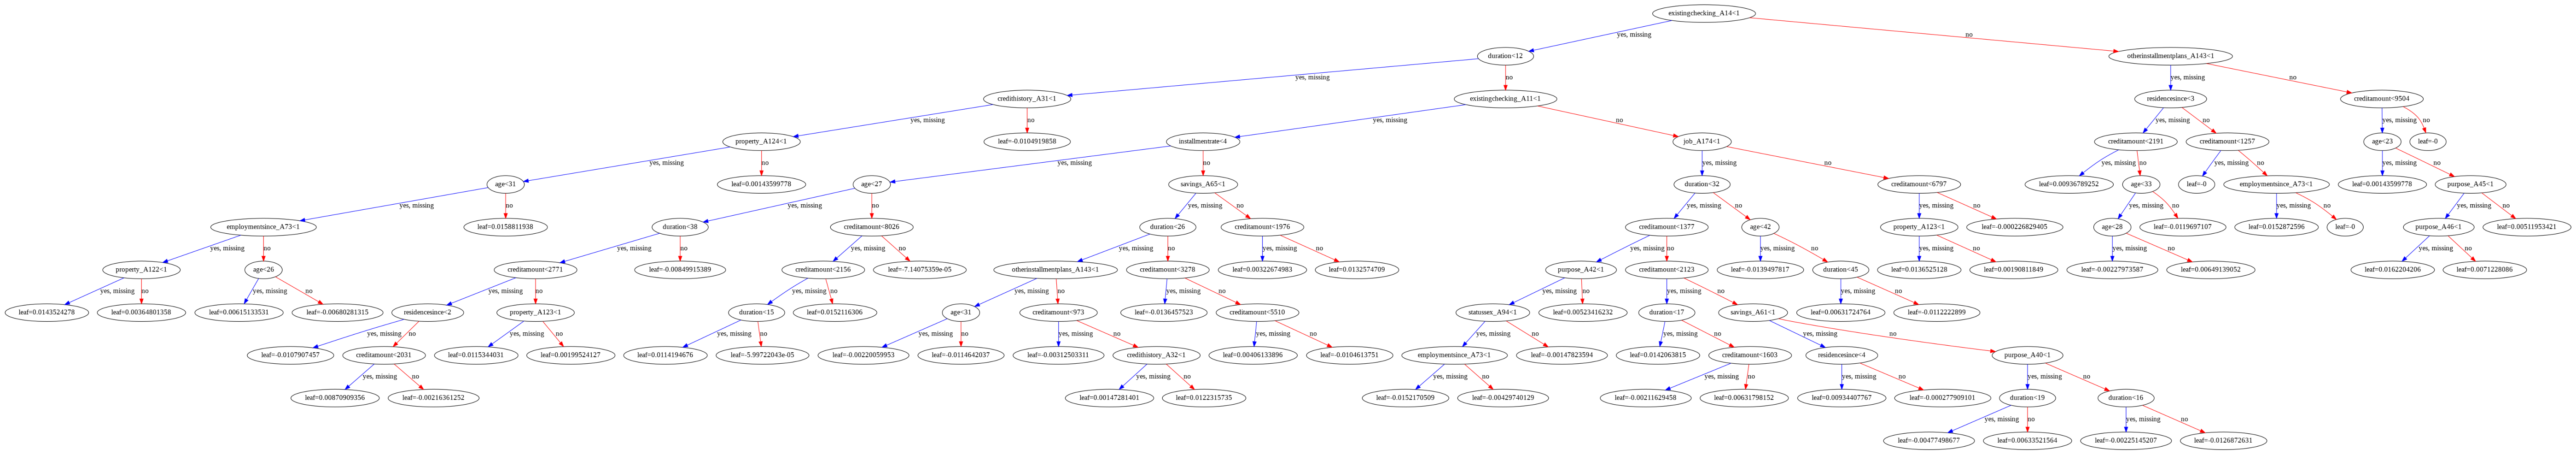

In [ ]:
# max_depth=10 is too large to be plot here

from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree(XGB, num_trees=10, ax=ax)
# Double click on the graph to zoom in

### 4.5 KNN

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.43      0.30      0.35        90
           1       0.73      0.83      0.78       210

    accuracy                           0.67       300
   macro avg       0.58      0.56      0.57       300
weighted avg       0.64      0.67      0.65       300

[[ 27  63]
 [ 36 174]]
Accuracy of the model on Testing Sample Data: 0.65

Accuracy values for 10-fold Cross Validation:
 [0.6444608  0.6010395  0.58736676 0.65866667 0.59466667 0.57268643
 0.60852744 0.5784326  0.57083333 0.64303534]

Final Average Accuracy of the model: 0.61


### 4.6 Support Vector Machine

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300

[[  0  90]
 [  0 210]]
Accuracy of the model on Testing Sample Data: 0.58

Accuracy values for 10-fold Cross Validation:
 [0.57647059 0.57647059 0.57647059 0.57647059 0.57647059 0.57647059
 0.57647059 0.57647059 0.57647059 0.57647059]

Final Average Accuracy of the model: 0.58


### 4.7 Naive Bayes

In [ ]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        90
           1       0.86      0.76      0.81       210

    accuracy                           0.74       300
   macro avg       0.71      0.73      0.71       300
weighted avg       0.77      0.74      0.75       300

[[ 63  27]
 [ 50 160]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.7402222  0.71895121 0.73347237 0.71895121 0.74599729 0.73833389
 0.63483483 0.71578348 0.75498575 0.72010045]

Final Average Accuracy of the model: 0.72


## 5: Deploying a predictive model as an API (**ongoing project !!!**)

Step 1. Retraining the model using 100% data

In [ ]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X_clean,y_clean)



Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X_clean , y_clean, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))




Accuracy values for 10-fold Cross Validation:
 [0.57647059 0.57647059 0.57647059 0.57647059 0.57647059 0.57647059
 0.57647059 0.57647059 0.57647059 0.57647059]

Final Average Accuracy of the model: 0.58



Step 2. Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


Step 3. Create a python function

In [ ]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [ ]:
SelectedColumns=['existingchecking','credithistory','purpose','savings','employmentsince',
 'statussex','otherdebtors','property','otherinstallmentplans','housing','foreignworker',
 'age', 'creditamount', 'duration']

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()

existingchecking credithistory purpose  ... age creditamount duration
0              A11           A34     A43  ...  67         1169        6
1              A12           A32     A43  ...  22         5951       48
2              A14           A34     A46  ...  49         2096       12
3              A11           A32     A42  ...  45         7882       42
4              A11           A33     A40  ...  53         4870       24

[5 rows x 14 columns]

In [ ]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
             'history', 'purpose', 'savings','status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

In [ ]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_employ, inp_age , inp_amount, inp_duration,
                           inp_checkingstatus,inp_history, inp_purpose, 
                           inp_savings, inp_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_employ, inp_age , inp_amount, inp_duration,
           inp_checkingstatus,inp_history, inp_purpose, inp_savings, inp_status]],
     columns=['employmentsince', 'age', 'creditamount', 'duration','existingchecking', 
         'history', 'purpose', 'savings','statussex'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_employ='A73', 
                       inp_age= 22, 
                       inp_amount=5951,
                       inp_duration=48,
                       inp_checkingstatus='A12',
                       inp_history='A32',
                       inp_purpose='A43',
                       inp_savings='A61',
                       inp_status='A92')

NameError: ignored

# Day 3:  Neural Network and unsupervised Learning

## **Partie1 : Unsupervised Learning**

Where there is no response variable Y and the aim is to identify the clusters with in the data based on similarity with in the cluster members. Different algorithms like K-means, Hierarchical, PCA,Spectral Clustering, DBSCAN Clustering etc. are used for these problems

Imagine we are provided with the same data ([german credit])(https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) but without any label (Classification). What we want to do is clustering our clients and see if, from that procedure, we can get some relevant information about their being creditworthy.

**Data downloading**

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']


In [ ]:
data = pd.read_csv(url,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


existingchecking  duration  ... foreignworker classification
0              A11         6  ...          A201              1
1              A12        48  ...          A201              2
2              A14        12  ...          A201              1
3              A11        42  ...          A201              1
4              A11        24  ...          A201              2
5              A14        36  ...          A201              1
6              A14        24  ...          A201              1
7              A12        36  ...          A201              1
8              A14        12  ...          A201              1
9              A12        30  ...          A201              2

[10 rows x 21 columns]

In [ ]:
#variable reduction
XNames= ['existingchecking', 'credithistory', 'purpose', 'savings', 
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job','creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits']
CNames= ['existingchecking', 'credithistory', 'purpose', 'savings', 
            'property', 'otherinstallmentplans', 'housing', 'job','creditamount', 'duration',   'age', 
           'existingcredits']

datf=data[CNames] # Select short Name
datf.head()

existingchecking credithistory purpose  ... duration age existingcredits
0              A11           A34     A43  ...        6  67               2
1              A12           A32     A43  ...       48  22               1
2              A14           A34     A46  ...       12  49               1
3              A11           A32     A42  ...       42  45               1
4              A11           A33     A40  ...       24  53               2

[5 rows x 12 columns]

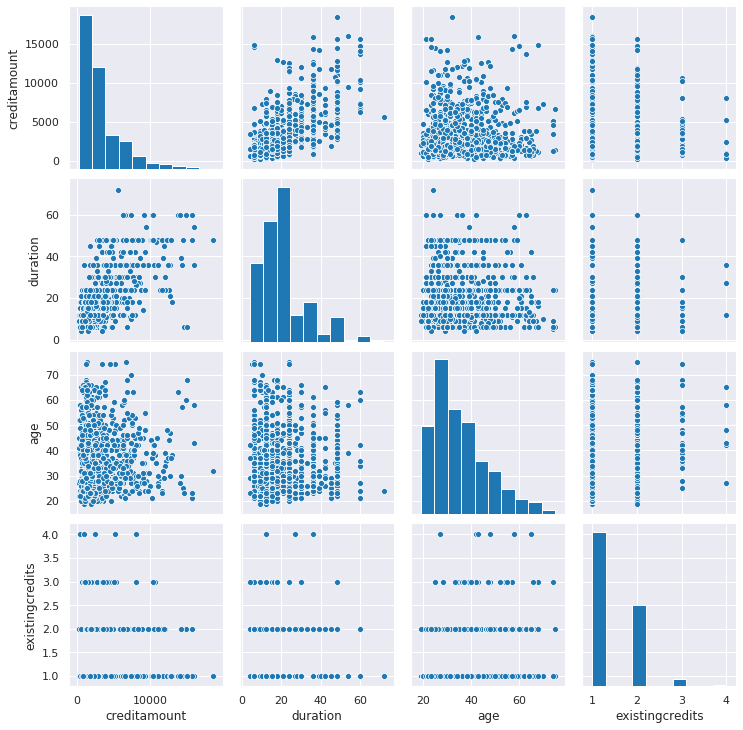

In [ ]:
sns.pairplot(datf)

### Section 1. Standardization

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit([1, 2, 2, 6])

# List to store Categorical Columns
cat_cols = list(datf.columns[datf.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)

# List to store Numerical Columnsa
num_cols = list(datf.columns[datf.dtypes != 'object'])
print("\nNumerical Columns:" ,num_cols)

## One-Hot Encoding Categorical Columns
data_dummy =  pd.get_dummies(datf[cat_cols], drop_first=True)

## Joining New dummified and Numerical columns
data_new = pd.concat([data_dummy, datf[num_cols]], axis=1, join='inner')

#### Normalizing the Dataset
ss = StandardScaler()

data_normal = ss.fit_transform(data_new)

Categorical Columns:  ['existingchecking', 'credithistory', 'purpose', 'savings', 'property', 'otherinstallmentplans', 'housing', 'job']

Numerical Columns: ['creditamount', 'duration', 'age', 'existingcredits']


In [ ]:
data_dummy 

existingchecking_A12  existingchecking_A13  ...  job_A173  job_A174
0                       0                     0  ...         1         0
1                       1                     0  ...         1         0
2                       0                     0  ...         0         0
3                       0                     0  ...         1         0
4                       0                     0  ...         1         0
..                    ...                   ...  ...       ...       ...
995                     0                     0  ...         0         0
996                     0                     0  ...         0         1
997                     0                     0  ...         1         0
998                     0                     0  ...         1         0
999                     1                     0  ...         1         0

[1000 rows x 30 columns]

In [ ]:
data_normal[1,:]
print(len(data_normal))
print("specific values")
b=data_normal[1,:]
print(len(b))
#for x in b: 
#print(x)

1000
specific values
34


In [ ]:
data_new

existingchecking_A12  existingchecking_A13  ...  age  existingcredits
0                       0                     0  ...   67                2
1                       1                     0  ...   22                1
2                       0                     0  ...   49                1
3                       0                     0  ...   45                1
4                       0                     0  ...   53                2
..                    ...                   ...  ...  ...              ...
995                     0                     0  ...   31                1
996                     0                     0  ...   40                1
997                     0                     0  ...   38                1
998                     0                     0  ...   23                1
999                     1                     0  ...   27                1

[1000 rows x 34 columns]

### Section 2. PCA steps

- Standardization (if need)
- Correlation Matrix
- eigendecomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Section 2.1. PCA using Covariance matrix

In [ ]:
#Standardization was already performed above
# we have used the numpy cov function:
features=data_normal.copy()
print('NumPy covariance matrix: \n%s' %np.cov(features.T))

NumPy covariance matrix: 
[[ 1.001001   -0.15745354 -0.4896252  ... -0.05587288 -0.07819968
  -0.05271514]
 [-0.15745354  1.001001   -0.20928919 ... -0.06436724  0.03754141
  -0.04025313]
 [-0.4896252  -0.20928919  1.001001   ...  0.00198698  0.06249889
   0.09452921]
 ...
 [-0.05587288 -0.06436724  0.00198698 ...  1.001001    0.26668587
   0.08971495]
 [-0.07819968  0.03754141  0.06249889 ...  0.26668587  1.001001
   0.14940299]
 [-0.05271514 -0.04025313  0.09452921 ...  0.08971495  0.14940299
   1.001001  ]]


Next, we perform an eigendecomposition on the covariance matrix:

In [ ]:
cov_mat = np.cov(features.T) # covariance or correlation matrix here are the same
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #eigenvalue decomposition
print('Eigenvectors \n%s' %eig_vecs)   # print eigenvectors (steps toward PCA)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.39180828e-02 -1.80286386e-01 -2.44127254e-01 ...  1.58869329e-01
   9.88126158e-02  2.54557081e-02]
 [ 3.90897278e-02 -2.23366897e-02  5.79069895e-02 ... -2.65822512e-01
  -2.09108478e-02 -1.35379289e-01]
 [ 1.99966198e-02  2.55032984e-01  1.25116693e-01 ... -7.23711275e-03
  -1.09812391e-01  1.56699903e-02]
 ...
 [-1.85644978e-01  1.51197516e-02  2.34854615e-01 ...  1.46914946e-04
   1.49756323e-01 -4.02947032e-02]
 [-2.11257293e-01  1.69410505e-01  1.63106592e-01 ...  7.93271259e-02
  -2.72913884e-02 -2.60514399e-01]
 [-1.08761469e-01  4.15525123e-01  1.53351600e-02 ... -9.35322831e-03
   6.69287925e-02 -3.57686387e-02]]

Eigenvalues 
[3.30003141 2.49515102 2.14915905 2.00458208 1.76375637 1.65813127
 0.03772132 0.05888631 0.08164637 1.5712108  1.53073775 0.18104744
 0.2428977  0.26416202 0.32156018 0.32636052 0.42731907 0.45916351
 0.52465594 1.34483858 0.62505519 0.65145667 1.28398095 0.73366383
 0.77032646 0.82173274 0.83282134 1.19885526 1.17163182 1.15972551
 

#### Section 2.2. Correlation matrix

Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix:

In [ ]:
cor_mat1 = np.corrcoef(features.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.39180828e-02 -1.80286386e-01  2.44127254e-01 ...  1.58869329e-01
   9.88126158e-02  2.54557081e-02]
 [ 3.90897278e-02 -2.23366897e-02 -5.79069895e-02 ... -2.65822512e-01
  -2.09108478e-02 -1.35379289e-01]
 [ 1.99966198e-02  2.55032984e-01 -1.25116693e-01 ... -7.23711275e-03
  -1.09812391e-01  1.56699903e-02]
 ...
 [-1.85644978e-01  1.51197516e-02 -2.34854615e-01 ...  1.46914946e-04
   1.49756323e-01 -4.02947032e-02]
 [-2.11257293e-01  1.69410505e-01 -1.63106592e-01 ...  7.93271259e-02
  -2.72913884e-02 -2.60514399e-01]
 [-1.08761469e-01  4.15525123e-01 -1.53351600e-02 ... -9.35322831e-03
   6.69287925e-02 -3.57686387e-02]]

Eigenvalues 
[3.29673138 2.49265587 2.14700989 2.0025775  1.76199261 1.65647314
 0.0376836  0.05882742 0.08156472 1.56963959 1.52920701 0.18086639
 0.24265481 0.26389786 0.32123862 0.32603416 0.42689176 0.45870434
 0.52413128 1.34349374 0.62443013 0.65080522 1.28269697 0.73293016
 0.76955614 1.19765641 1.17046019 1.15856579 0.82091101 0.83198852
 

Results look quite similar thanks to the standardization we have performed early

#### Section 2.3. Singular Vector Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. 

So one concerts a rectangular matrix to a square one prior to the eigenvalue decomposition

let us perform an SVD to confirm that the result are indeed the same:
Calculating the SVD consists of finding the eigenvalues and eigenvectors of A*(trA) and tr(A)*A. The eigenvectors of A*(trA)make up the columns of V , the eigenvectors of A*(trA)  make up the columns of U. Also, the singular values in S are square roots of eigenvalues from tr(A)*A or A*tr(A).

tr: transpose


In [ ]:
u,s,v = np.linalg.svd(features.T)
u

array([[ 0.02391808, -0.18028639,  0.24412725, ..., -0.02490675,
        -0.0052515 ,  0.00950739],
       [-0.03908973, -0.02233669, -0.05790699, ...,  0.00150937,
        -0.00088067,  0.01246425],
       [-0.01999662,  0.25503298, -0.12511669, ..., -0.03382251,
         0.01844273, -0.01094127],
       ...,
       [ 0.18564498,  0.01511975, -0.23485461, ..., -0.00946966,
         0.00349259, -0.01667031],
       [ 0.21125729,  0.1694105 , -0.16310659, ...,  0.03450099,
        -0.00059224,  0.01525831],
       [ 0.10876147,  0.41552512, -0.01533516, ..., -0.01526532,
        -0.03096565,  0.0212626 ]])

One gets a similar value

#### Section 2.3. Selecting Principal Components
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [ ]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In order to decide which eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [ ]:
 #Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.296731381947909
2.4926558689995075
2.14700989178445
2.002577495797979
1.7619926147436915
1.6564731431075195
1.5696395914231682
1.5292070086633427
1.3434937430423508
1.2826969702575772
1.1976564054267258
1.1704601884882626
1.158565787340552
1.1264019248275228
1.1182361145104875
1.056200874085092
1.0463520895024734
1.0383305981099342
1.0027954500138343
0.9890504980585443
0.9506506040198354
0.9326212943475174
0.9008300487380112
0.8762542800604761
0.8319885166037921
0.8209110082585744
0.7695561381222586
0.7329301641196654
0.6508052166622106
0.6244301340478818
0.5241312802123929
0.4587043421309025
0.42689175565280274
0.32603415800896457
0.32123861508990575
0.26389786278641075
0.24265480505692905
0.1808663943906629
0.08156471957295806
0.05882742370796934
0.03768359827895983


After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
#! pip install chart_studio
import chart_studio
#chart_studio.tools.set_credentials_file(username='emma2020', api_key='4zyXMLtxs6FsgyjozOIC')
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.io as pio

#chart_studio.tools.set_config_file(world_readable=false, sharing='private')
#import chart_studio.plotly as py
#from  plotly.offline import plot
#import plotly.plotly as py
#import plotly.graph_objs as go

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
#plot.plot(fig, filename='selecting-principal-components')
#plotly.offline.iplot(fig, filename='selecting-principal-components')
pio.show(fig, filename='selecting-principal-components')
#py.iplot(fig, filename='selecting-principal-components')

It looks like we might need many PCs to explain the variance. The first two one explained only 15% of the variance. We need to check once our data.

In [ ]:
#Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

matrix_w = np.hstack((eig_pairs[0][1].reshape(41,1), 
                      eig_pairs[1][1].reshape(41,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-2.39180828e-02 -1.80286386e-01]
 [ 3.90897278e-02 -2.23366897e-02]
 [ 1.99966198e-02  2.55032984e-01]
 [-7.49698512e-02 -4.95185856e-02]
 [ 1.74940802e-01 -4.39854082e-01]
 [-9.38298564e-02  9.30519033e-02]
 [-7.76320128e-02  4.46095860e-01]
 [-1.87754633e-01 -2.27739654e-02]
 [-1.26363217e-01 -5.28439432e-02]
 [ 7.80733280e-02 -7.49325525e-02]
 [ 1.52914397e-01  4.96184075e-02]
 [ 5.30502869e-02 -4.73737532e-02]
 [-3.14684548e-03  2.87885261e-02]
 [-8.22932623e-02 -2.25373919e-02]
 [ 4.55011477e-02  2.33705351e-04]
 [-4.75116482e-02  6.15792470e-02]
 [-4.50801476e-03 -6.49245688e-02]
 [ 3.22356707e-02  2.02149408e-02]
 [ 2.97127047e-02  6.57022313e-02]
 [-7.11516526e-02  3.86492977e-02]
 [ 1.55153172e-01 -2.09955988e-01]
 [-2.35850409e-01  2.31229687e-01]
 [ 1.47407221e-01 -4.71828805e-02]
 [-3.74390955e-02 -4.38386135e-02]
 [ 7.26801495e-02 -4.22660162e-02]
 [ 9.63561820e-02  3.84549880e-02]
 [ 8.11170453e-02  4.65868946e-02]
 [-4.04339630e-01 -1.69980467e-01]
 [-2.6944

#### Section 2.4 PCA in scikit-learn
For educational purposes, we went a long way above to apply the PCA. But luckily, there is already implementation in scikit-learn.

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(2)  # set number of PC
projected = pca.fit_transform(features)
print(features.shape)
print(projected.shape)

(1000, 41)
(1000, 2)


In [ ]:
#The fit learns some quantities from the data, most importantly the "components" and "explained variance":
print(pca)

     First component  Second Component
0           0.304058          3.069198
1          -1.111188         -2.282199
2           0.326418          2.027457
3           1.916823         -2.104015
4           4.104873          0.091132
..               ...               ...
995        -1.788505         -0.995139
996         0.850084         -1.113123
997        -1.256942          0.551748
998         2.444591         -2.130773
999         1.235834          0.462521

[1000 rows x 2 columns]


First component     float64
Second Component    float64
dtype: object

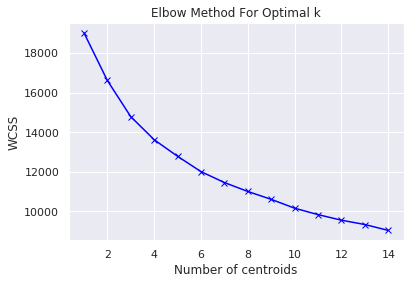

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

The number of clusters is an hyperparameter that has to be defined or 'optimized'. For sake of simplicy, we used k=3

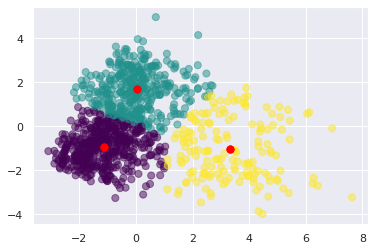

In [ ]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First component','Second Component']
#build our algorithm with k=3, train it on pca and make predictions
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)
#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

We have some overlaps between classess.

In [ ]:
#We start by loading the data:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [ ]:
#we can now plot the first two principal components of each point to learn about the data:

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

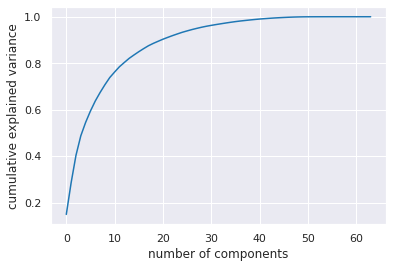

In [ ]:
#plot of components

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
!rm -rf ML2/
!git clone https://github.com/emmapenka/ML2/

Cloning into 'ML2'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 92 (delta 3), reused 0 (delta 0), pack-reused 82
Unpacking objects: 100% (92/92), done.


In [ ]:
from functools import reduce
import os
import re 
import time

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import neural_network

import sys
sys.path += ['ML2/']
from local_utils import DrawNN

In [ ]:
ROOT_DIR='ML2/'
DATA_DIR=os.path.join(ROOT_DIR, '') # C'est ici que se trouve les notes 
DATA_DIR_20ML=os.path.join(ROOT_DIR, '') # C'est ici que se trouve les *tags*

## Partie 2: LSTM - COVID 19 Forecasting

Here we proceed as

*   Download Covid-19 data
*  Use LSTM as implemented in PyTorch
*  forecast covid incidences for the next 30 days

Note that current code doesnt yield any stable result,



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 181,801
Trainable params: 181,801
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:137: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/300
10/10 [==============================] - 2s 40ms/step - loss: 0.1919 - val_loss: 1.0137
Epoch 2/300
10/10 [==============================] - 0s 16ms/step - loss: 0.0978 - val_loss: 0.5288
Epoch 3/300
10/10 [==============================] - 0s 15ms/step - loss: 0.0215 - val_loss: 0.1744
Epoch 4/300
10/10 [==============================] - 0s 17ms/step - loss: 0.0162 - val_loss: 0.0219
Epoch 5/300
10/10 [==============================] - 0s 16ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 6/300
10/10 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 0.0253
Epoch 7/300
10/10 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 8/300
10/10 [==============================] - 0s 15ms/step - loss: 4.4064e-04 - val_loss: 0.0078
Epoch 9/300
10/10 [==============================] - 0s 16ms/step - loss: 3.7849e-04 - val_loss: 0.0036
Epoch 10/300
10/10 [==============================] - 0s 16ms/step - loss: 1.7946e-04 - val_

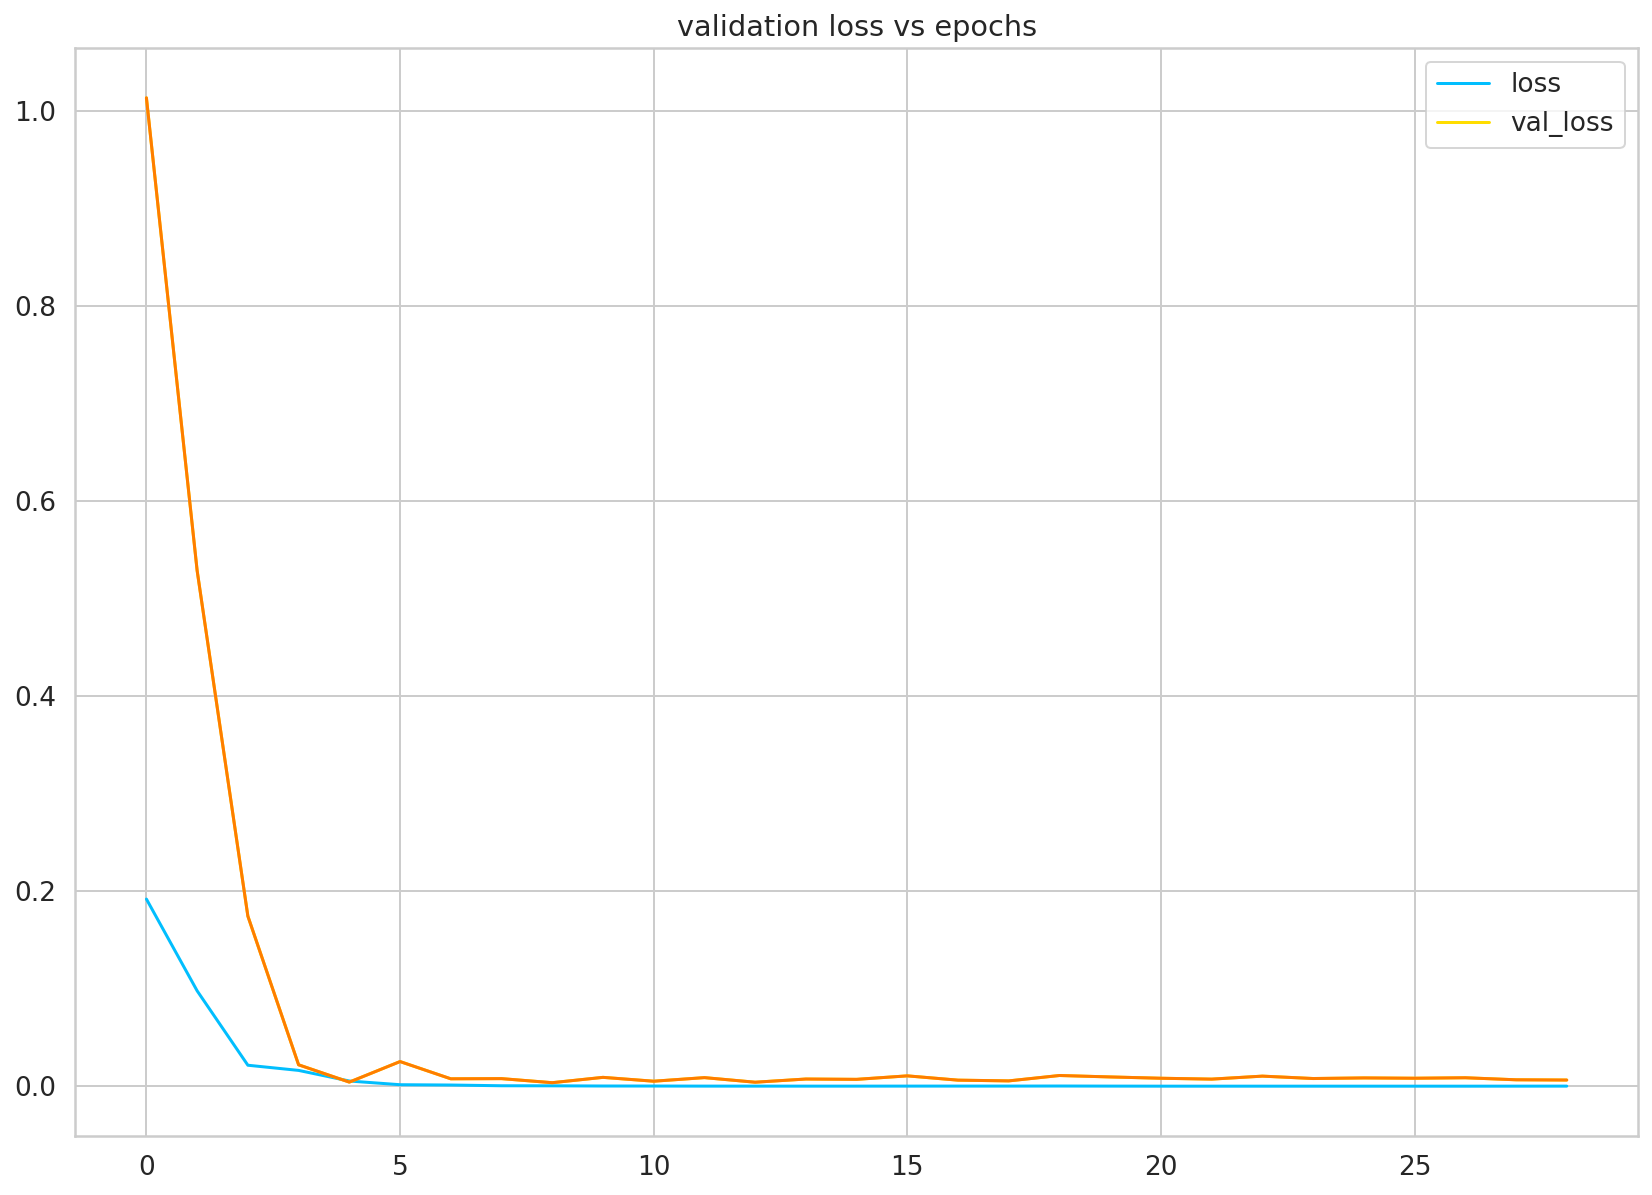

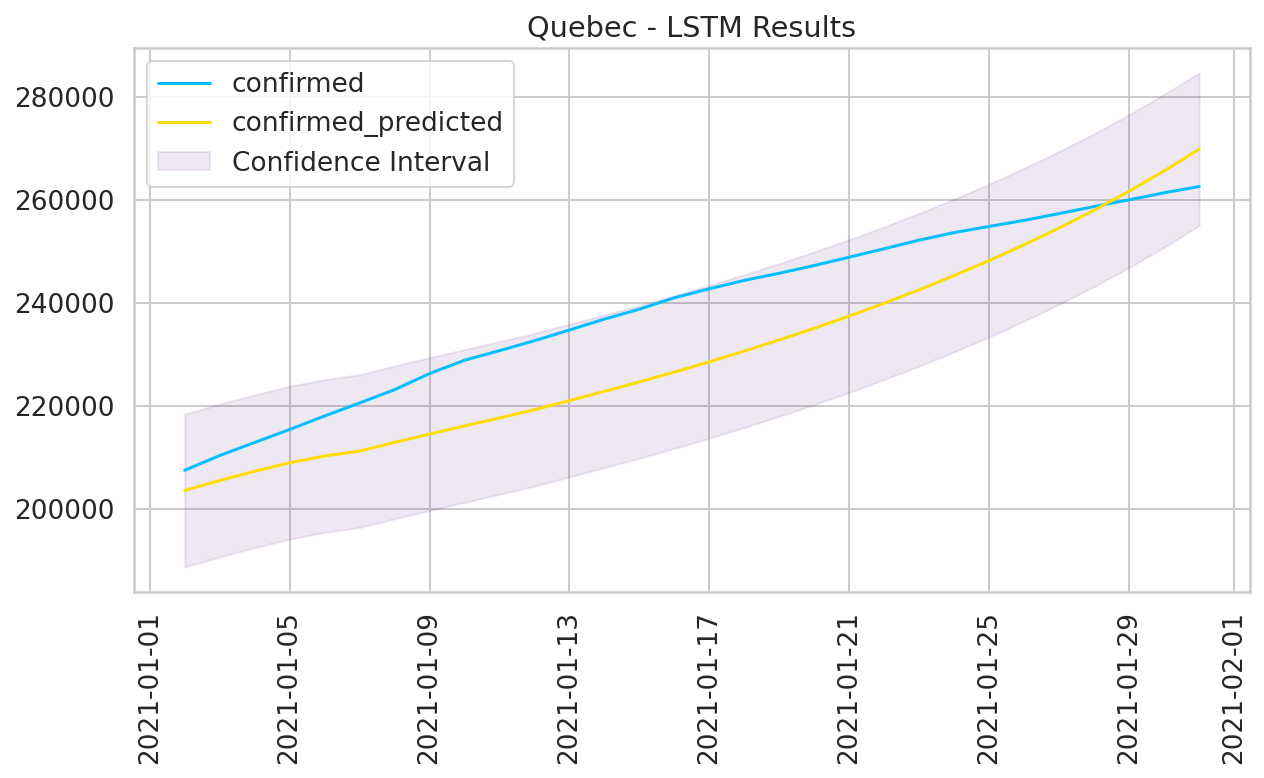

10111.808179651012
9217.597626717885


In [ ]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
torch.manual_seed(42)
RANDOM_SEED = 42
#np.random.seed(RANDOM_SEED)
#torch.manual_seed(RANDOM_SEED)


np.random.seed(37)
torch.manual_seed(1254)

#import tensorflow as tf
#import random as rn

#os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy-generated random numbers
#np.random.seed(37)

# Setting the seed for python random numbers
#rn.seed(1254)

# Setting the graph-level random seed.
#tf.set_random_seed(89)
#split_date ='2008-04-12'
import datetime

# !! if you get a timeout-error, just click on the link and download the data manually !!
# some train data set
url2 = 'https://raw.githubusercontent.com/emmapenka/ML2/master/canada2.csv'

df_can_= pd.read_csv(url2)

df_can_['Date']= pd.to_datetime(df_can_['Date'])
#-----------------------------
Seuil = '2020-07-01'
df_can__=  df_can_.loc[df_can_['Date'] >= Seuil]
df_can=df_can__[['Date','Geo','Confirmed','Deaths','Recovered']]
df_can['Date']= pd.to_datetime(df_can['Date'])
#data['Date'] = pd.to_datetime(data['Date'])
#df_can.set_index('Date',inplace=True)
#data.head()

Prediction ='Confirmed'
split_date_one = '2020-12-30'

split_date_two = '2021-02-01'
df_train= df_can.loc[df_can['Date'] <= split_date_two]
#df_train = df_can.loc[df_can['Date'] >= split_date_one]
df_test = df_can.loc[df_can['Date'] >= split_date_two]
df_qc=df_train.loc[(df_train['Geo'] == 'QUEBEC')]

df_qc['Cases'] = df_qc["Confirmed"] -(df_qc["Confirmed"]).shift().fillna(0)
#df['new_cases'] = df.Confirmed - df.Confirmed.shift().fillna(0)

#train-test split
df_qc_train = df_qc[df_qc.Date < split_date_one]
df_tot= df_qc[df_qc.Date < split_date_two]
df_qc_test = df_qc[(df_qc.Date >= split_date_one ) & (df_qc.Date< split_date_two)]
df_qc_test

df_qc_testb = df_qc[df_qc.Date< split_date_two]

daily_cases=df_tot[['Date',Prediction]]

daily_cases.set_index('Date',inplace=True)
test_data_size = 30
train = daily_cases[:-test_data_size]
test = daily_cases[-test_data_size:]


##scale or normalize data as the data is too skewed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) #find max value

scaled_train = scaler.transform(train)#and divide every point by max value
scaled_test = scaler.transform(test)
## feed in batches [t1,t2,t3] --> t4
from keras.preprocessing.sequence import TimeseriesGenerator
## how to decide num of inputs , 
n_input = 5  ## number of steps
n_features = 1 ## number of features you want to predict (for univariate time series n_features=1)
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)

## above takes 5 inputs and predicts next point in scaled_train
## smaller batch size leads to better trainig for time series

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(200,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.summary()


validation_set = np.append(scaled_train[55],scaled_test) ## !!!! to be changed

#validation_set = np.append(scaled_train[55],scaled_test)
validation_set=validation_set.reshape(test_data_size+1,1)

## how to decide num of inputs , 
n_input = 5
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length=5,batch_size=1)

validation_gen[0][0].shape,validation_gen[0][1].shape


from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)


model.fit_generator(generator,validation_data=validation_gen,epochs=300,callbacks=[early_stop],steps_per_epoch=10)


pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")


myloss = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(myloss)),myloss)


## holding predictions
test_prediction = []

##last n points from training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)
current_batch.shape


## how far in future we can predict
#test_data_size=31
##  PLEASE change to 7
for i in range(len(test)+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)



  ### inverse scaled data
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction[:,0]


time_series_array = test.index
for k in range(0,7):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))
time_series_array


df_forecast = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=time_series_array)


df_forecast.loc[:,"confirmed_predicted"] = true_prediction[:,0]
df_forecast.loc[:,"confirmed"] = test["Confirmed"]

#plt.ylim([80000,85000])
df_forecast.plot(title=" Quebec Predictions for next 7 days")

MAPE = np.mean(np.abs(np.array(df_forecast["confirmed"][:5]) - np.array(df_forecast["confirmed_predicted"][:5]))/np.array(df_forecast["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

sum_errs = np.sum((np.array(df_forecast["confirmed"][:5]) - np.array(df_forecast["confirmed_predicted"][:5]))**2)
sum_errs

stdev = np.sqrt(1/(5-2) * sum_errs)
interval = 1.96 * stdev
df_forecast["confirm_min"] = df_forecast["confirmed_predicted"] - interval
df_forecast["confirm_max"] = df_forecast["confirmed_predicted"] + interval

country='Quebec'
from datetime import datetime
df_forecast["Country"] = country
df_forecast["Execution date"] = str(datetime.now()).split()[0]
df_forecast.dropna()


### save model
model.save("models/confirmed_{0}_{1}.h5".format(country,str(datetime.now()).split()[0]))
df_forecast.iloc[:,:4].plot()

df_forecast=df_forecast.dropna()

fig= plt.figure(figsize=(10,5))
plt.title("{} - LSTM Results".format(country))
plt.plot(df_forecast.index,df_forecast["confirmed"],label="confirmed")
plt.plot(df_forecast.index,df_forecast["confirmed_predicted"],label="confirmed_predicted")
#ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
plt.fill_between(df_forecast.index,df_forecast["confirm_min"],df_forecast["confirm_max"],color="indigo",alpha=0.09,label="Confidence Interval")
plt.legend()
plt.xticks(rotation=90)
plt.show()

#@title LSTM

dN=df_forecast.dropna()
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score
MSE = np.sqrt(mean_squared_error(dN.confirmed.values, dN.confirmed_predicted.values))
MAE = mean_absolute_error(dN.confirmed.values, dN.confirmed_predicted.values)

print (MSE)
print (MAE)



## Partie 3: CNN with TensorFlow

# New Section

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170508288/170498071 [==============================] - 14s 0us/step


Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

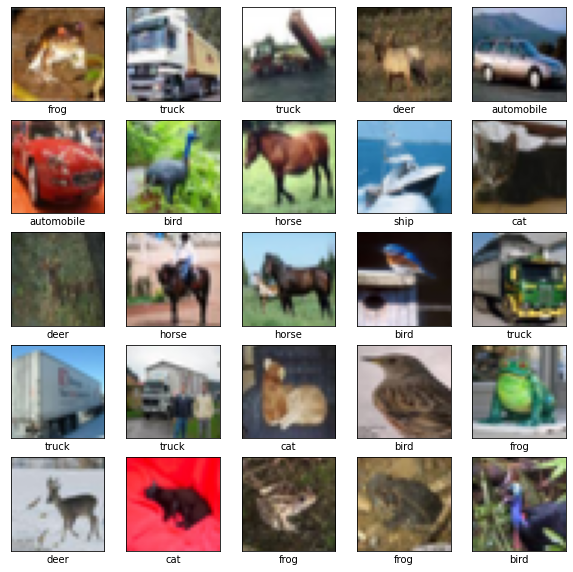

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


**Create the convolutional base**

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


Let's display the architecture of your model so far:

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

**Add Dense layers on top**

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

**Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5293 - accuracy: 0.4422 - val_loss: 1.2732 - val_accuracy: 0.5401
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1610 - accuracy: 0.5867 - val_loss: 1.1323 - val_accuracy: 0.5944
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0065 - accuracy: 0.6470 - val_loss: 1.0024 - val_accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9134 - accuracy: 0.6798 - val_loss: 0.9802 - val_accuracy: 0.6568
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8389 - accuracy: 0.7065 - val_loss: 0.9088 - val_accuracy: 0.6830
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7887 - accuracy: 0.7225 - val_loss: 0.9224 - val_accuracy: 0.6924
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7399 - accuracy: 0.7382 - val_loss: 0.9259 -

Evaluate the model

313/313 - 4s - loss: 0.9031 - accuracy: 0.6985 - 4s/epoch - 11ms/step


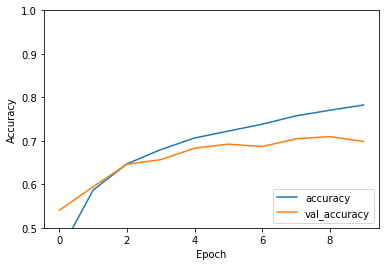

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)


0.6984999775886536


Reference is [here](https://www.tensorflow.org/tutorials/images/cnn)

#Références

- [Scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Model Selection](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
-[Adam Massachi](https://www.dataquest.io/blog/kaggle-getting-started/)
- [github by S. B. Iqbal ](https://github.com/S-B-Iqbal)
- [PCA with Python](https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/)
- [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

<a id="concluding-remarks"></a>
# ** Complement: AMES Housing** 

The competition challenges you to predict the final price of each home.
At this point, we should start to think about what we know about housing prices, Ames, Iowa, and what we might expect to see in this dataset.

Looking at the data, we see features we expected, like YrSold (the year the home was last sold) and SalePrice. Others we might not have anticipated, such as LandSlope (the slope of the land the home is built upon) and RoofMatl (the materials used to construct the roof). Later, we’ll have to make decisions about how we’ll approach these and other features.

Avant de terminer:

Reference  [here](https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a)

The hedonic method is a regression technique used to estimate the prices of qualities or models that are not available on the market in particular periods, but whose prices in those periods are needed in order to be able to construct price relatives.

It is based on the hypothesis that the prices of different models on sale on the market at the same time are functions of certain measurable characteristics such as size, weight, power, speed, etc and so regression methods can be used to estimate by how much the price varies in relation to each of the characteristics. 

In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [ ]:
# Load AMES Housing training and test data from CSV
hs_train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
hs_test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
#hs_train = pd.read_csv('../input/train.csv')
#hs_test = pd.read_csv('../input/test.csv')

In [ ]:
#Let’s check out the size of the data.
train=hs_train
test=hs_test
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We see that test has only 80 columns, while train has 81. This is due to, of course, the fact that the test data do not include the final sale price information!

Next, we’ll look at a few rows using the DataFrame.head() method.

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

We should have the data dictionary available in our folder for the competition. You can also find it here https://github.com/emmapenka/ML2.

Here’s a brief version of what you’ll find in the data description file:



*   SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.
*   MSSubClass — The building class
*   MSZoning — The general zoning classification
* LotFrontage — Linear feet of street connected to property
* LotArea — Lot size in square feet
* Street — Type of road access
* Alley — Type of alley access
* LotShape — General shape of property
* LandContour — Flatness of the property
*Utilities — Type of utilities available
*LotConfig — Lot configuration
*And so on.

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


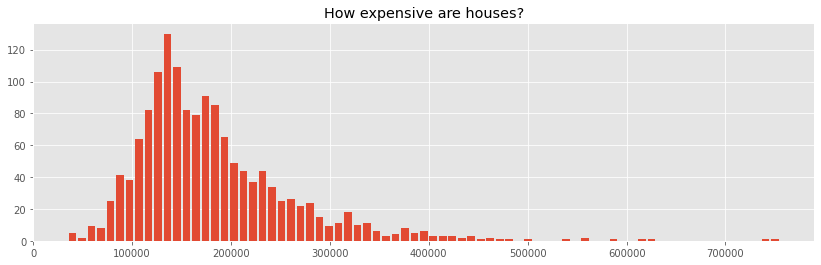

In [ ]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Oldest house built in 1872. Newest house built in 2010.


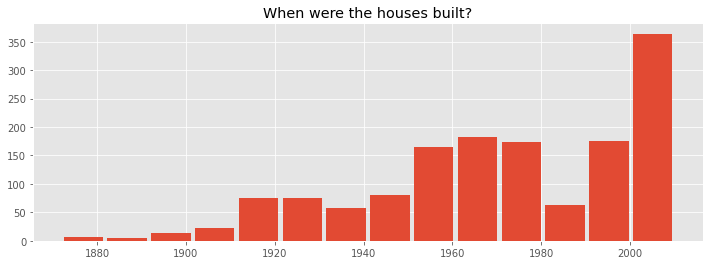

In [ ]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

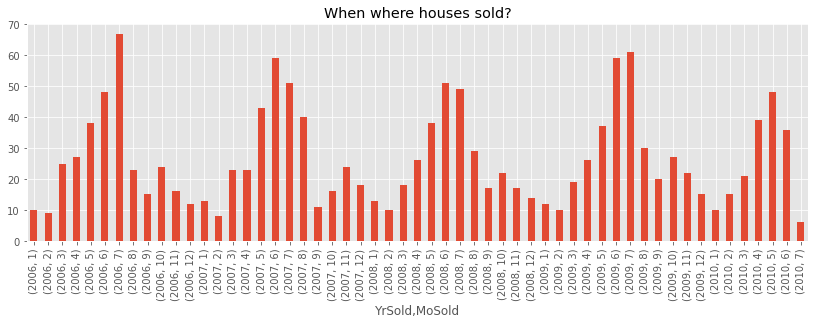

In [ ]:
# When where houses sold?
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()

The average house has 1,515 sq ft of space, the median 1,464 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


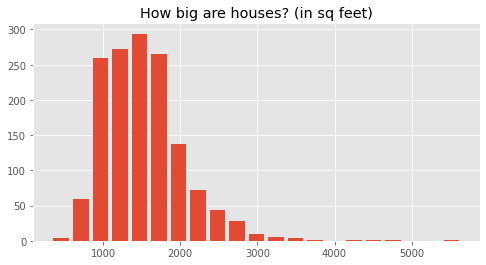

In [ ]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.GrLivArea.mean(), train.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.GrLivArea.max(), train.GrLivArea.min()))
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

## A) Explanatory Analysis

In [ ]:
missing = train.isna().sum()
missing = missing[missing>0]
missing_perc = missing/train.shape[0]*100
na = pd.DataFrame([missing, missing_perc], index = ['missing_num', 'missing_perc']).T
na = na.sort_values(by = 'missing_perc', ascending = False)
na

missing_num  missing_perc
PoolQC             1453.0     99.520548
MiscFeature        1406.0     96.301370
Alley              1369.0     93.767123
Fence              1179.0     80.753425
FireplaceQu         690.0     47.260274
LotFrontage         259.0     17.739726
GarageType           81.0      5.547945
GarageYrBlt          81.0      5.547945
GarageFinish         81.0      5.547945
GarageQual           81.0      5.547945
GarageCond           81.0      5.547945
BsmtExposure         38.0      2.602740
BsmtFinType2         38.0      2.602740
BsmtFinType1         37.0      2.534247
BsmtCond             37.0      2.534247
BsmtQual             37.0      2.534247
MasVnrArea            8.0      0.547945
MasVnrType            8.0      0.547945
Electrical            1.0      0.068493

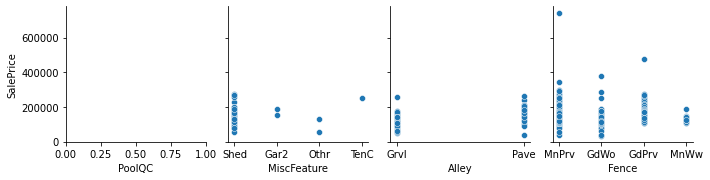

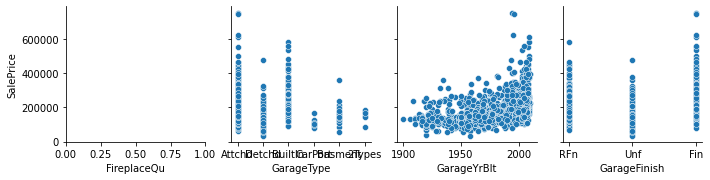

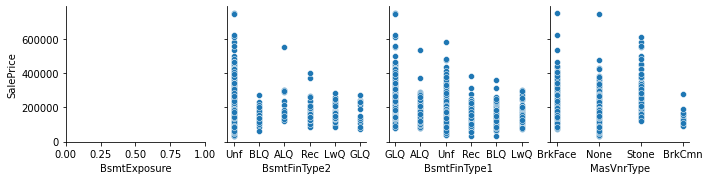

<Figure size 432x288 with 0 Axes>

In [ ]:


sns.pairplot(x_vars = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], y_vars = 'SalePrice', data = train)
plt.show()
sns.pairplot(x_vars = [ 'FireplaceQu','GarageType', 'GarageYrBlt', 'GarageFinish'],  y_vars = 'SalePrice', data = train)
plt.show()
sns.pairplot(x_vars = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'], y_vars = 'SalePrice', data = train)
plt.show()
plt.savefig('myfig.jpg')


In [ ]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


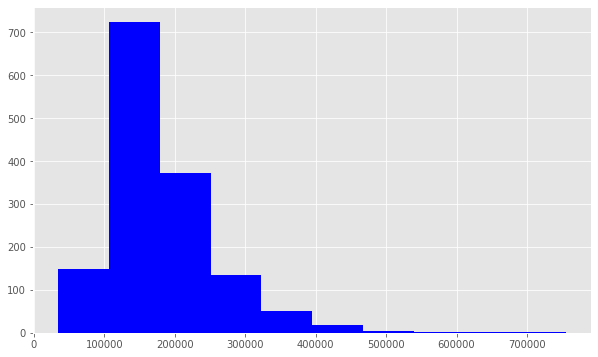

In [ ]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Now we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.

Skew is: 0.12133506220520406


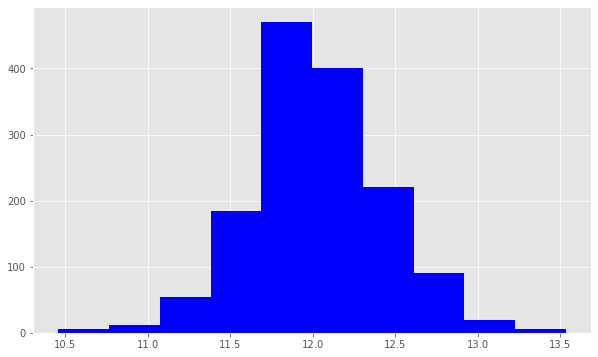

In [ ]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

Working with Numeric Features

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [ ]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


To help us visualize this pivot table more easily, we can create a bar plot using the Series.plot() method.

In [ ]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

AttributeError: ignored

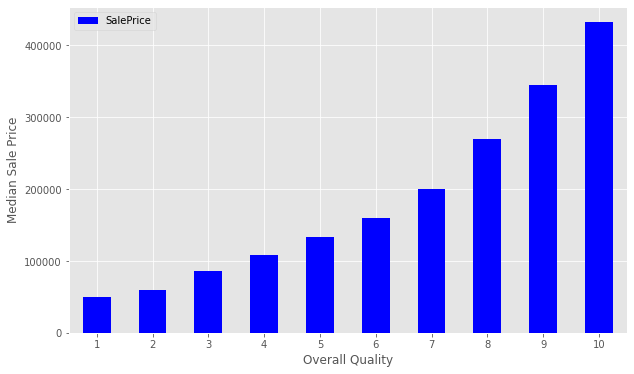

In [ ]:
quality_pivot
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0).plt.show()

Next, let’s use plt.scatter() to generate some scatter plots and visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

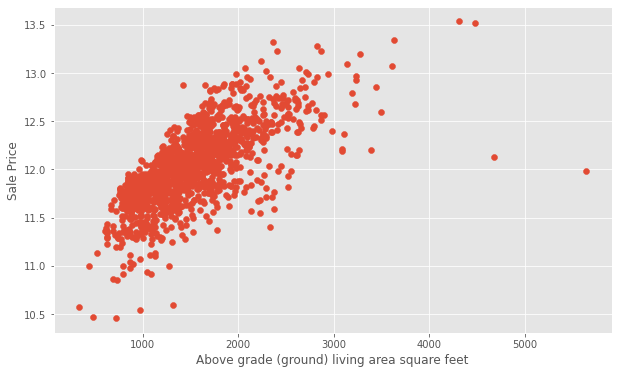

In [ ]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

At first glance, we see that increases in living area correspond to increases in price. We will do the same for GarageArea.


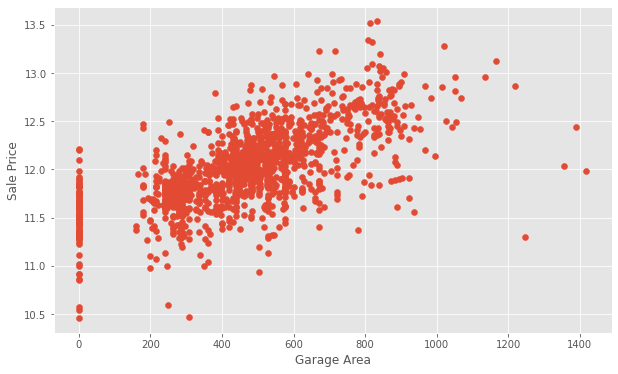

In [ ]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

### A.1) Handling Null Values
Next, we’ll examine the null or missing values.

We will create a DataFrame to view the top null columns. Chaining together the train.isnull().sum() methods, we return a Series of the counts of the null values in each column.

In [ ]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0

The documentation can help us understand the missing values. In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
We can find a similar relationship between many of the Garage-related columns.

Let’s take a look at one of the other columns, MiscFeature. We’ll use the Series.unique() method to return a list of the unique values.


In [ ]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


We can use the documentation to find out what these values indicate:

MiscFeature: Miscellaneous feature not covered in other categories

   * Elev Elevator
   *Gar2 2nd Garage (if not described in garage section)


   * Othr Other
   * Shed Shed (over 100 SF)
   * TenC Tennis Court
   * NA   None
* These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later. It’s important to gather domain knowledge in order to make the best decisions when dealing with missing data.

### A.2)Wrangling the non-numeric Features#
Let’s now consider the non-numeric features.



In [ ]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

The count column indicates the* count* of non-null observations, while *unique* counts the number of unique values. top is the most commonly occurring value, with the frequency of the top value shown by freq.

For many of these features, we might want to use **one-hot encoding** https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f to make use of the information for modeling.
One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

### A.3) Transforming and engineering features
When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

In [ ]:
#To demonstrate how this works, consider the Street data, which indicates whether there is Gravel or Paved road access to the property.

print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

In [ ]:
#We create a new column called enc_street. The pd.get_dummies() method will handle this for us.
#As mentioned earlier, we need to do this on both the train and test data.

train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


The values agree. We’ve engineered our first feature! Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

Let’s try engineering another feature. We’ll look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual.


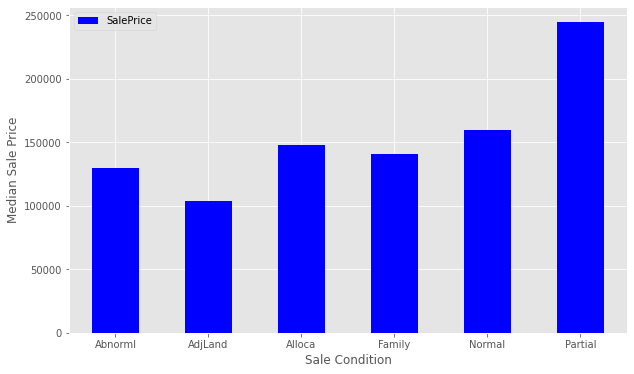

In [ ]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

Follow a similar method that we used for Street above.


In [ ]:
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)


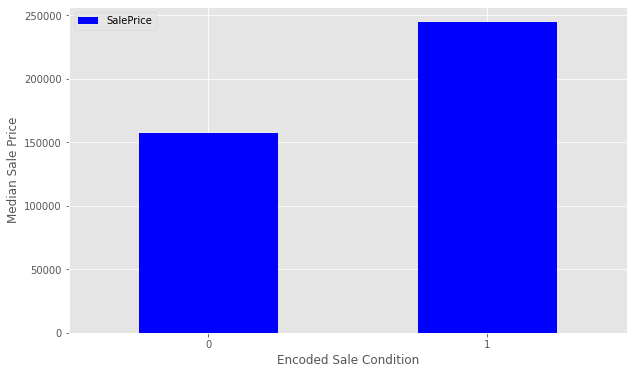

In [ ]:
#Let’s explore this new feature as a plot.
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

This looks great. You can continue to work with more features to improve the ultimate performance of your model.

Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation(https://en.wikipedia.org/wiki/Interpolation). The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. This is another area where you can extend on this tutorial.


In [ ]:

data = train.select_dtypes(include=[np.number]).interpolate().dropna()
#Check if the all of the columns have 0 null values.

sum(data.isnull().sum() != 0)

0

bold text#Step 1 : Build a linear model
Let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns we want to exclude. We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [ ]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

* X_train is the subset of our features used for training.
* X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
* y_train is the target variable SalePrice which corresponds to X_train.
* y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

## B) Begin modelling
We will first create a Linear Regression model. First, we instantiate the model.


In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we’ll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.



In [ ]:
model = lr.fit(X_train, y_train)

### B.1) Evaluate the performance and visualize results
Now, we want to evaluate the performance of the model.
Each competition might evaluate the submissions differently. In this competition, Kaggle will evaluate our submission using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8647463410578186


Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set.


In [ ]:
predictions = model.predict(X_test)

The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

The mean_squared_error function takes two arrays and calculates the rmse.


In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.02305146819191358


Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship graphically with a scatter plot.


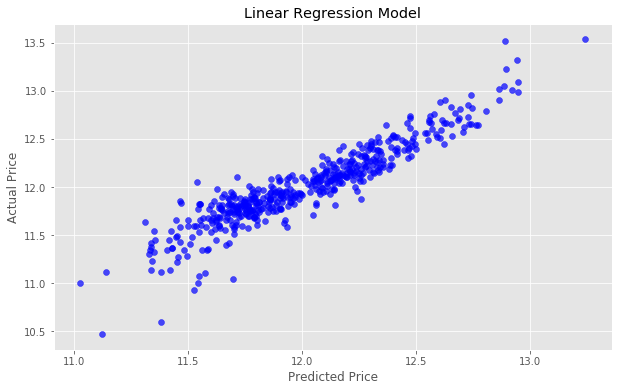

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

### B.2) Try to improve the model
We’ll next try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

We’ll experiment by looping through a few different values of alpha, and see how this changes our results

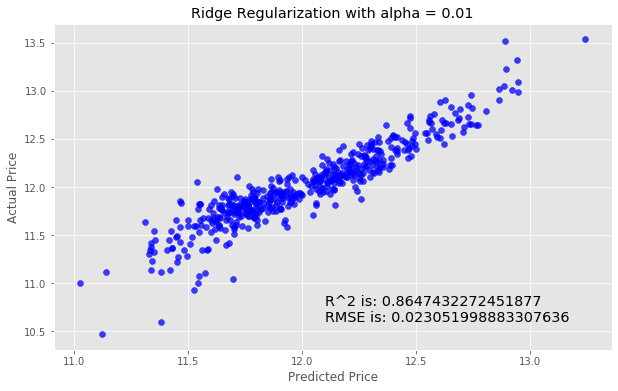

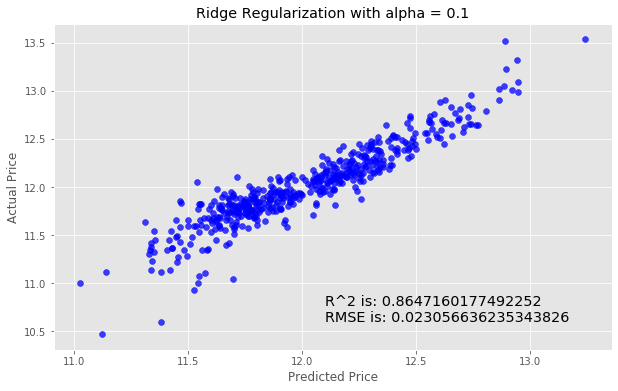

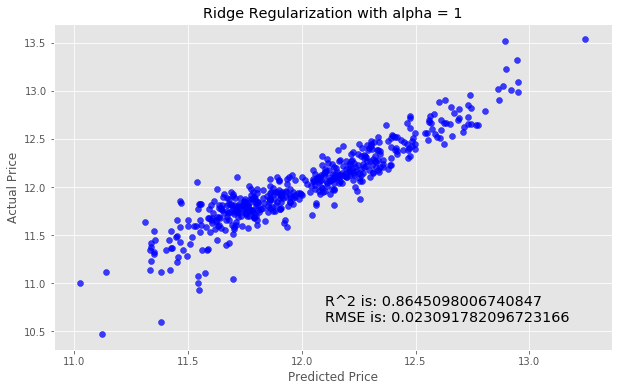

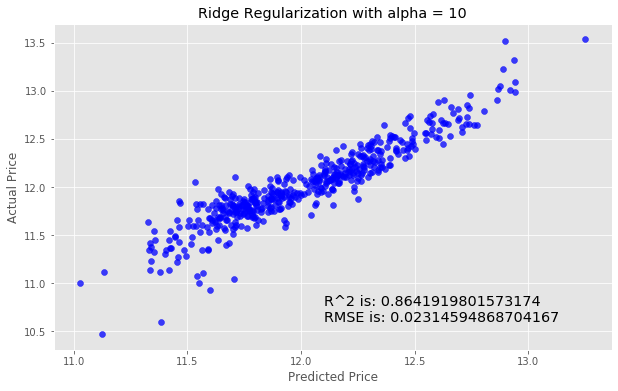

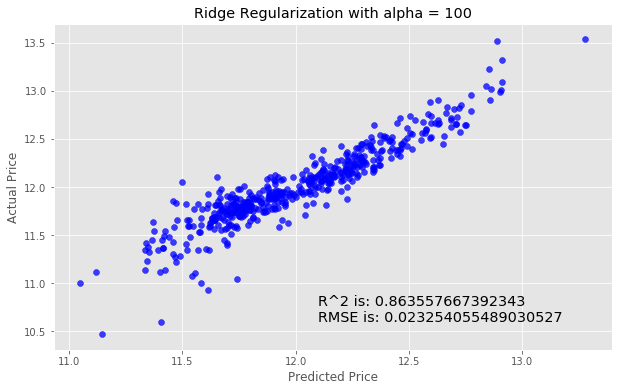

In [ ]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularization can be helpful. Repeat this step after you’ve added more features.

### B.3) Make a submission
We’ll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

We’ll log in to our Kaggle account and go to the submission page to make a submission.
We will use the DataFrame.to_csv() to create a csv to submit.
The first column must the contain the ID from the test data.


In [ ]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Now, select the features from the test data for the model as we did above.



In [ ]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [ ]:
#Next, we generate our predictions.

predictions = model.predict(feats)

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.


In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
#Look at the difference.

print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])


Original predictions are: 
 [11.68856268 11.71858472 12.03237122 12.18181274 12.10677502] 

Final predictions are: 
 [119200.5537467  122833.45845104 168109.56584158 195206.40091533
 181094.63485685]


In [ ]:
#Original predictions are:
#  [ 11.76725362  11.71929504  12.07656074  12.20632678  12.11217655]
#Final predictions are:
#  [ 128959.49172586  122920.74024358  175704.82598102  200050.83263756  182075.46986405]
#Lets assign these predictions and check that everything looks good.

submission['SalePrice'] = final_predictions
submission.head(10)


Id      SalePrice
0  1461  119200.553747
1  1462  122833.458451
2  1463  168109.565842
3  1464  195206.400915
4  1465  181094.634857
5  1466  175896.685032
6  1467  197890.753192
7  1468  171497.332751
8  1469  197683.025062
9  1470  119274.800038

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

X = train[['OverallQual']].values
y = train.SalePrice.values

kfold = KFold(n_splits=5, random_state=4, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
#https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
results.mean()

0.6264229090787292


When dealing with real datasets, there are often cases where the test and train sets are very different. As a result, the internal cross-validation techniques might give scores that are not even in the ballpark of the test score. In such cases, adversarial validation offers an interesting solution.

The general idea is to check the degree of similarity between training and tests in terms of feature distribution. If It does not seem to be the case, we can suspect they are quite different. This intuition can be quantified by combining train and test sets, assigning 0/1 labels (0 – train, 1-test) and evaluating a binary classification task.

In [ ]:
#Let's see if we can improve on this by bringing in by Binarizing our categorical vairables and using Random Forest:

from sklearn.ensemble import RandomForestRegressor
hs_train_simp_bin = pd.get_dummies(train)

y = hs_train_simp_bin.pop('SalePrice')
X = hs_train_simp_bin.values
kfold = KFold(n_splits=5, random_state=4, shuffle=True)
model = RandomForestRegressor()
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')



## C) Data Preprocessing

In [ ]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [ ]:
#train = pd.read_csv("./train.csv")
#test = pd.read_csv("./test.csv")
train=hs_train
test=hs_test

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [ ]:
print('Train Data: \n')
print("Number of columns: "+ str(train.shape[1]))
print("Number of rows: "+ str(train.shape[0]))
print('\nTest Data: \n')
print("Number of columns: "+ str(test.shape[1]))
print("Number of rows: "+ str(test.shape[0]))

In [ ]:
#descriptive statistics summary
train['SalePrice'].describe()

### C.1) Relation Exploration for Few Numerical Variables

The target variable is right skewed(positive skewness) and show peakedness. As (linear) models fits better on normally distributed data , we require proper transformation.

1. Transform the skewed numeric features by taking log(feature + 1) - to make features more normal
Transformation Performed after univariate analysis


In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

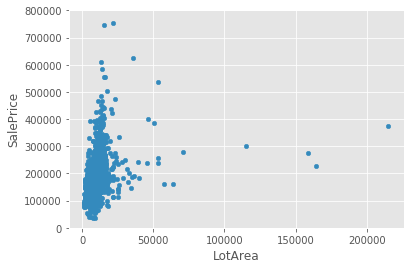

In [ ]:
#scatter plot LotArea/saleprice
var = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

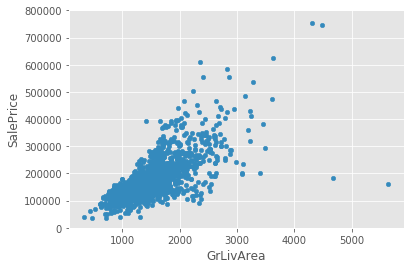

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:

#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


'TotalBsmtSF','LotArea' and 'GrLivArea' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF' and 'LotArea' we can see that the slope of the linear relationship are particularly high.

### C.2) Relation Exploration for categorical features

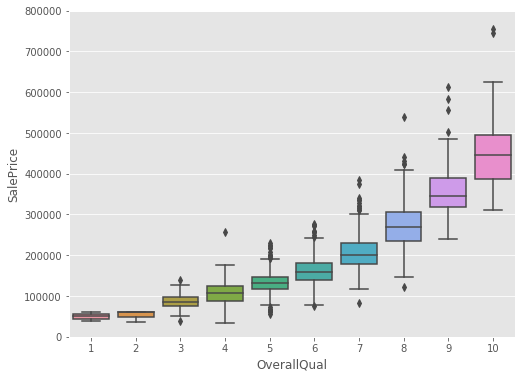

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

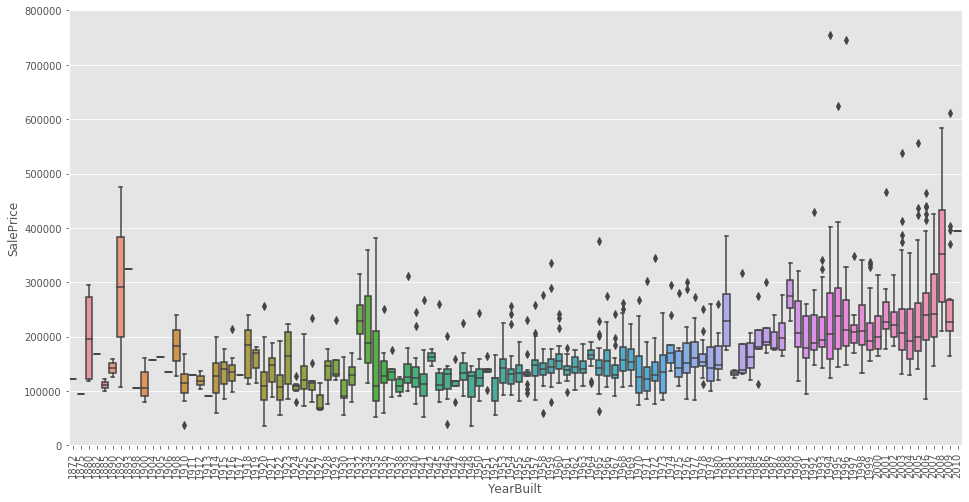

In [ ]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

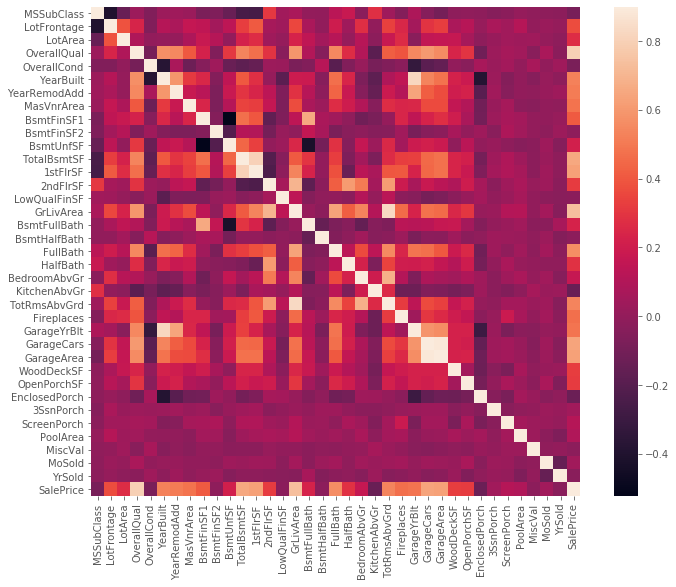

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


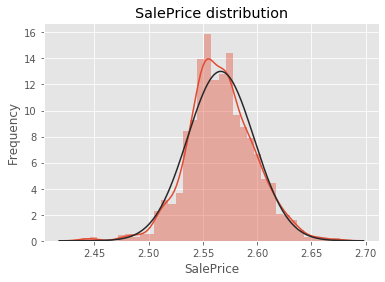

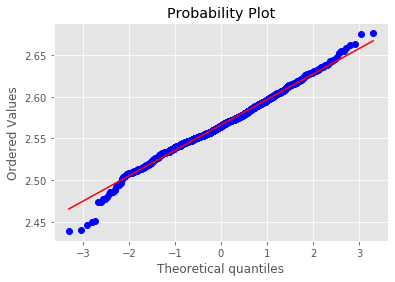

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# Kernel Density Plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [ ]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

print("all_data size is : {}".format(all_data.shape))
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

all_data size is : (2917, 79)


Missing Ratio
PoolQC            99.691464
MiscFeature       96.400411
Alley             93.212204
Fence             80.425094
FireplaceQu       48.680151
LotFrontage       16.660953
GarageFinish       5.450806
GarageYrBlt        5.450806
GarageQual         5.450806
GarageCond         5.450806
GarageType         5.382242
BsmtExposure       2.811107
BsmtCond           2.811107
BsmtQual           2.776826
BsmtFinType2       2.742544
BsmtFinType1       2.708262
MasVnrType         0.822763
MasVnrArea         0.788481
MSZoning           0.137127
BsmtFullBath       0.068564


### C.3) Imputing missing values¶
Based on feature description provided, following features if has NA means it's absent("None").

In [ ]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
# Replacing missing data with 0 (Since No garage = no cars in such garage).
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
# missing values are likely zero for having no basement 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    #     
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [ ]:
# For below categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
# Setting mode value for missing entries 

#MSZoning classification : 'RL' is common
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Functional : NA = typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

# Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

# KitchenQual
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#SaleType
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [ ]:

#  Dropping as same value 'AllPub' for all records except 2 NA and 1 'NoSeWa'
all_data = all_data.drop(['Utilities'], axis=1)

In [ ]:
# Transforming required numerical features to categorical

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
#Label Encoding some categorical variables 
# for information in their ordering set

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [ ]:
# Adding Total surface area as 'TotalSF'= basement+firstflr+secondflr

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) #compute skewness
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(5)


Skew in numerical features: 



Skew
MiscVal       21.939672
PoolArea      17.688664
LotArea       13.109495
LowQualFinSF  12.084539
3SsnPorch     11.372080

### C.4) Box Cox Transformation of (highly) skewed features

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform



### C.5) Adding dummy categorical features

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.SalePrice.values
train = pd.DataFrame(all_data[:ntrain])
test = pd.DataFrame(all_data[ntrain:])

## D) Regression Modeling

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

For Cross-validation purpose we can use cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code on Alexandru function, in order to shuffle the dataset prior to cross-validation

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Implementing Regression Models
1. Lasso Regression
2. Kernel Ridge Regression
3. Elastic Net Regression
4. Gradient Boosting Regression
5. XGBoost
6. Light GBM

In [ ]:
#1
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#2
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#3
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#4
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#5
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,seed=7, nthread = -1)
#6
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Scores for above base models

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: nan (nan)

Kernel Ridge score: nan (nan)

ElasticNet score: nan (nan)

Gradient Boosting score: nan (nan)

Xgboost score: 0.0188 (0.0011)

LGBM score: 0.0091 (0.0005)



In [ ]:
# XGBoost

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

# LightGBM

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.017329901066238527
0.00565990778233451


## Acknowledgments 

1)  https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa

2)  [Farukh Hashmi](https://thinkingneuron.com/german-credit-risk-classification-case-study-in-python/)